## Health Logs Dashboard for Monitoring Sport Players Performance

In this project, we'll utilize numerous datasets to track performance of players in a dashboard. We'll use [PMData: Sports Logging Dataset](https://www.kaggle.com/datasets/vlbthambawita/pmdata-a-sports-logging-dataset) which contains 5-month lifelog data of 16 participants collected from sensors and platforms: Fitbit Versa 2 smartwatch wristband, PMSys sports logging app, and Google Forms for data collection.  

The lifelogs in each player are preserved in folders of `pXX` (XX being the ID), inside we can find folders of: 

* `fitbit`
    * `calories.json` -- burned calories by last minute (cal), 
    * `distance.json` -- distance moved per minute (cm),
    * `exercise.json` -- details of each activity, from start-stop time to performance metrics for respective exercise (various units),
    * `heart_rate.json` -- heart beats per minute (bpm),
    * `lightly_active_minutes.json` -- lightly active minutes per day (min),
    * `moderately_active_minutes.json` -- moderately active minutes per day (min),
    * `resting_heart_rate.json` -- resting heart rate per day (bpm),
    * `sedentary_minutes.json` -- sedentary minutes per day (min),
    * `sleep_score.csv` -- trends in sleep patterns (various units),
    * `sleep.json` -- breakdown of sleep into periods of light, deep, REM sleeps, and time awake (mainly in min),
    * `time_in_heart_rate_zones.json` -- heart rates in minutes, grouped by 3 zones: fat burn (50-69% max HR), cardio (70-84% HR), and peak (85-100% HR) (min)
    * `very_active_minutes.json` -- very active minutes per day (min)
* `googledocs`
    * `reporting.csv` -- reports each day on: eaten meals (breakfast, lunch, dinner, and evening meal), weight, num of glasses drunk, and whether one has consumed alcohol (various units)
* `pmsys`
    * `injury.csv` -- date and time of injuries with corresponding locations and severity (various units)
    * `srpe.csv` -- data in training sessions as in the activity names, the perceived exertion (RPE), and duration (various units)
    * `wellness.csv` -- wellness parameters scored subjectively by day such as fatigue, mood, up to readiness (scales of 1-5 and 1-10) 
    * `food-images.zip` -- images of food consumed, captured by their own mobile cameras (images) (we're not using it for this project)
    
The author is intrigued in making the project since it could come in handy in several ways:
* Understanding data structure of sensor in health and wellness, in this case on FitBit sensor of biometrics and activity and PMSys for training load, injuries, and subjective wellness.
* Processing time-series health datasets into visualizations with intuitive data formatting and supporting actionable insights on potential stakeholders--from sport teams up to research organizations.

P.S. For all directories with additional `Sample: p01` on it, keep in mind that the dataset is complex to wrangle, so we need to dissect on one player beforehand for better understanding and then applying it to all players.

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
id_players = ['p' + str(player).zfill(2) for player in np.arange(1, 17)]
id_players

['p01',
 'p02',
 'p03',
 'p04',
 'p05',
 'p06',
 'p07',
 'p08',
 'p09',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16']

### Calories

In [3]:
df_calories = pd.DataFrame()

for pXX in id_players:
    
    calories = pd.read_json(f"{pXX}/fitbit/calories.json")
    calories['pXX'] = pXX
    df_calories = pd.concat([df_calories, calories])

In [4]:
df_calories

,dateTime,value,pXX
0,2019-11-01 00:00:00,1.39,p01
1,2019-11-01 00:01:00,1.39,p01
2,2019-11-01 00:02:00,1.39,p01
3,2019-11-01 00:03:00,1.39,p01
4,2019-11-01 00:04:00,1.39,p01
...,...,...,...
218875,2020-03-31 23:55:00,1.17,p16
218876,2020-03-31 23:56:00,1.17,p16
218877,2020-03-31 23:57:00,1.17,p16
218878,2020-03-31 23:58:00,1.17,p16


In [5]:
df_calories['date']  = df_calories['dateTime'].dt.date
df_calories['yearmonth'] = df_calories['dateTime'].dt.month + df_calories['dateTime'].dt.year * 100
df_calories = df_calories.rename(columns={'value': 'calories'})

In [6]:
df_calories

,dateTime,calories,pXX,date,yearmonth
0,2019-11-01 00:00:00,1.39,p01,2019-11-01,201911
1,2019-11-01 00:01:00,1.39,p01,2019-11-01,201911
2,2019-11-01 00:02:00,1.39,p01,2019-11-01,201911
3,2019-11-01 00:03:00,1.39,p01,2019-11-01,201911
4,2019-11-01 00:04:00,1.39,p01,2019-11-01,201911
...,...,...,...,...,...
218875,2020-03-31 23:55:00,1.17,p16,2020-03-31,202003
218876,2020-03-31 23:56:00,1.17,p16,2020-03-31,202003
218877,2020-03-31 23:57:00,1.17,p16,2020-03-31,202003
218878,2020-03-31 23:58:00,1.17,p16,2020-03-31,202003


In [7]:
df_cals = df_calories.groupby(['pXX', 'yearmonth'])['calories'].sum().reset_index()
df_cals['yearmonth'] = pd.to_datetime(df_cals['yearmonth'], format="%Y%m")
df_cals

,pXX,yearmonth,calories
0,p01,2019-11-01,111362.50
1,p01,2019-12-01,115786.34
2,p01,2020-01-01,111865.62
3,p01,2020-02-01,107020.17
4,p01,2020-03-01,102322.52
...,...,...,...
74,p16,2019-11-01,60487.52
75,p16,2019-12-01,64432.29
76,p16,2020-01-01,61279.76
77,p16,2020-02-01,57676.82


C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


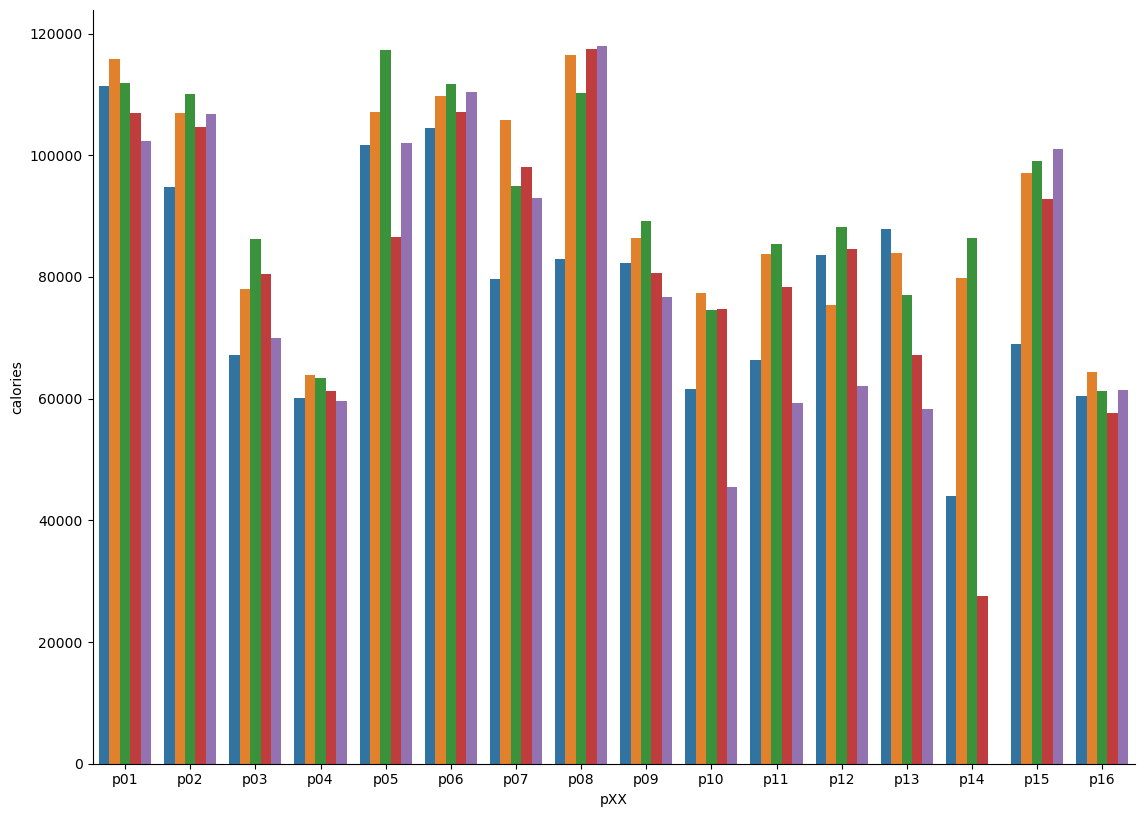

In [8]:
## Keep in mind: Violin plot, so that
# you could know if one player is active all the time
# or they would rather work it only at several days only

# (+) We could know the average calories they burn, and also the outliers.

sns.catplot(data=df_cals, x='pXX', y='calories', hue='yearmonth', 
    kind='bar', height=8.27, aspect=11.7/8.27)._legend.remove()

In [9]:
## Check for missing values:
df_cals_pivot = df_cals.pivot(values='calories', 
    index='yearmonth', columns='pXX').reset_index()
df_cals_pivot

pXX,yearmonth,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,p11,p12,p13,p14,p15,p16
0,2019-11-01,111362.50,94857.00,67181.75,60044.86,101696.33,104474.14,79702.47,83015.33,82312.92,61513.43,66397.63,83580.48,87831.47,44071.51,69039.01,60487.52
1,2019-12-01,115786.34,106874.00,77989.39,63911.44,107031.85,109808.67,105853.71,116469.73,86425.11,77380.77,83745.35,75394.59,84005.37,79880.34,97132.85,64432.29
2,2020-01-01,111865.62,110051.68,86206.50,63377.76,117349.85,111655.44,95028.76,110181.77,89213.68,74571.57,85377.65,88150.26,77055.94,86378.60,99141.77,61279.76
3,2020-02-01,107020.17,104604.26,80566.04,61309.16,86551.62,107090.91,98009.16,117494.27,80583.11,74745.39,78421.90,84640.57,67238.09,27607.43,92813.48,57676.82
4,2020-03-01,102322.52,106852.69,69982.39,59623.47,101948.05,110325.18,93028.28,117979.12,76751.38,45532.80,59274.88,62062.76,58233.63,NaN,101067.90,61361.71


In [10]:
## Player 14 recorded only 4 month of data. Recheck:
df_calories.loc[df_calories['pXX'] == 'p14']

,dateTime,calories,pXX,date,yearmonth
0,2019-11-13 00:00:00,1.13,p14,2019-11-13,201911
1,2019-11-13 00:01:00,1.13,p14,2019-11-13,201911
2,2019-11-13 00:02:00,1.13,p14,2019-11-13,201911
3,2019-11-13 00:03:00,1.13,p14,2019-11-13,201911
4,2019-11-13 00:04:00,1.13,p14,2019-11-13,201911
...,...,...,...,...,...
129595,2020-02-10 23:55:00,1.13,p14,2020-02-10,202002
129596,2020-02-10 23:56:00,1.13,p14,2020-02-10,202002
129597,2020-02-10 23:57:00,1.13,p14,2020-02-10,202002
129598,2020-02-10 23:58:00,1.13,p14,2020-02-10,202002


### Distance

In [11]:
df_distances = pd.DataFrame()

for pXX in id_players:
    
    distance = pd.read_json(f"{pXX}/fitbit/distance.json")
    distance['pXX'] = pXX
    df_distances = pd.concat([df_distances, distance])
    
df_distances['yearmonth'] = df_distances['dateTime'].dt.month + df_distances['dateTime'].dt.year * 100
df_distances = df_distances.rename(columns={'value': 'distances'})
df_distances['distances'] /= 100000 # Convert distances from cm to km

In [12]:
df_distances

,dateTime,distances,pXX,yearmonth
0,2019-11-01 00:00:00,0.0000,p01,201911
1,2019-11-01 00:01:00,0.0000,p01,201911
2,2019-11-01 00:02:00,0.0000,p01,201911
3,2019-11-01 00:03:00,0.0000,p01,201911
4,2019-11-01 00:04:00,0.0000,p01,201911
...,...,...,...,...
78567,2020-03-31 23:51:00,0.0000,p16,202003
78568,2020-03-31 23:52:00,0.0105,p16,202003
78569,2020-03-31 23:53:00,0.0000,p16,202003
78570,2020-03-31 23:55:00,0.0000,p16,202003


In [13]:
df_dists = df_distances.groupby(['pXX', 'yearmonth'])['distances'].sum().reset_index()
df_dists['yearmonth'] = pd.to_datetime(df_dists['yearmonth'], format="%Y%m")
df_dists

,pXX,yearmonth,distances
0,p01,2019-11-01,336.24688
1,p01,2019-12-01,347.80994
2,p01,2020-01-01,323.88826
3,p01,2020-02-01,301.99334
4,p01,2020-03-01,253.67848
...,...,...,...
74,p16,2019-11-01,56.01110
75,p16,2019-12-01,56.63860
76,p16,2020-01-01,36.37770
77,p16,2020-02-01,30.84900


C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


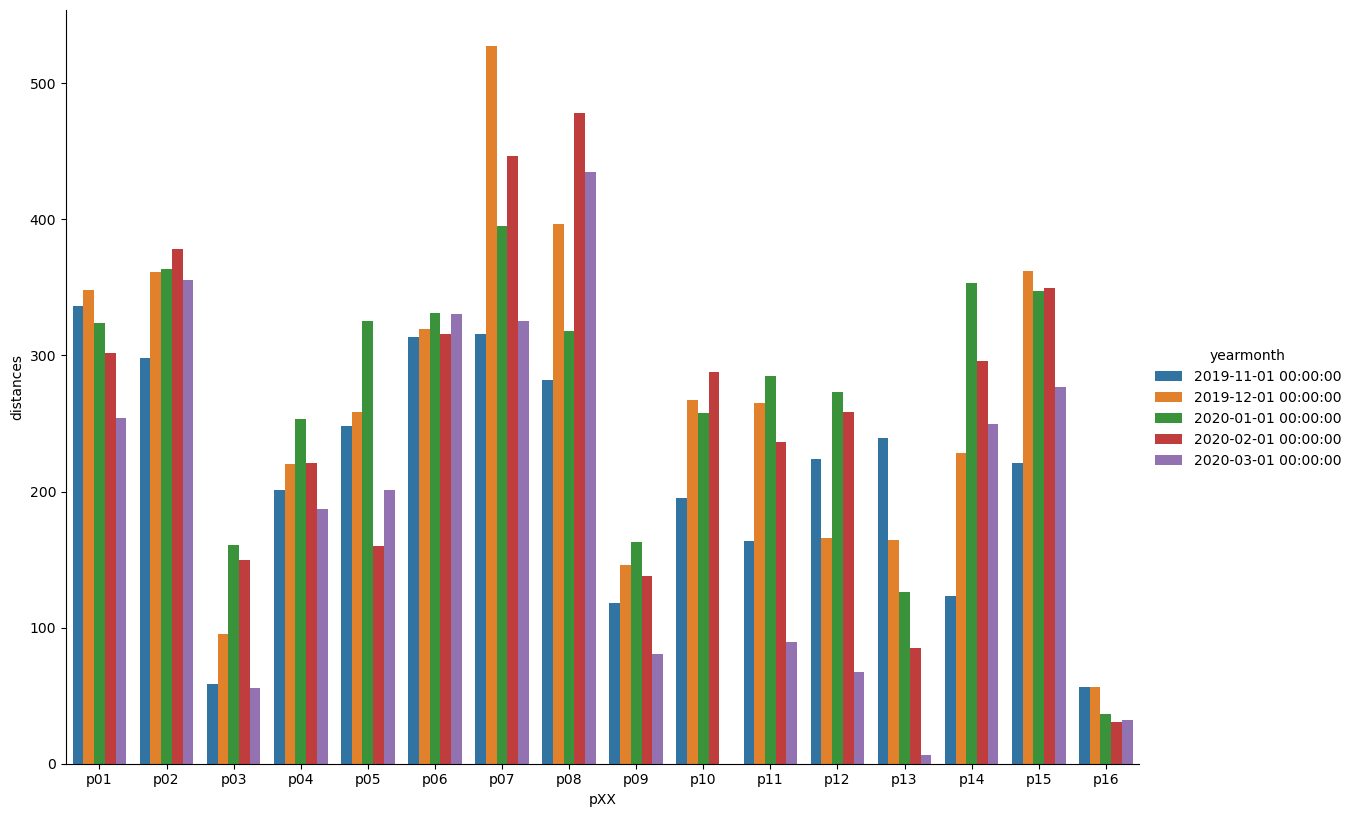

In [14]:
sns.catplot(data=df_dists, x='pXX', y='distances', hue='yearmonth', 
    kind='bar', height=8.27, aspect=11.7/8.27) #._legend.remove()

In [15]:
## Check for missing values:
df_dists_pivot = df_dists.pivot(values='distances', 
    index='yearmonth', columns='pXX').reset_index()
df_dists_pivot

pXX,yearmonth,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,p11,p12,p13,p14,p15,p16
0,2019-11-01,336.24688,298.24610,58.6183,201.37430,248.2763,313.7028,315.8475,281.6714,118.0547,195.5849,163.8833,224.0086,239.2025,123.3968,220.9263,56.0111
1,2019-12-01,347.80994,361.46199,95.6567,220.06422,258.5762,319.7245,527.4277,396.7740,146.2941,266.9120,265.3034,165.6635,164.2211,228.2940,362.2134,56.6386
2,2020-01-01,323.88826,363.84560,160.7410,253.11360,325.0883,330.8352,395.4368,318.0130,163.0870,257.9754,284.7697,273.4066,125.8124,353.1566,347.6322,36.3777
3,2020-02-01,301.99334,378.10780,150.0325,220.70790,160.1816,315.9721,446.2351,477.8101,138.2549,287.9133,236.2023,258.3557,85.3033,296.0242,349.5944,30.8490
4,2020-03-01,253.67848,355.34470,55.2747,186.97610,201.4354,330.5386,325.4313,434.7906,80.7644,NaN,89.0742,67.4493,6.1815,249.7185,276.9907,31.7597


### Exercise

#### Sample: `p01`

In [16]:
exercises = pd.read_json("p01/fitbit/exercise.json")
pd.options.display.max_columns  = 50
pd.options.display.max_colwidth = 1500

In [17]:
exercises.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,manualValuesSpecified,heartRateZones,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 8, 'name': 'fairly'}, {'minutes': 14, 'name': 'very'}]",94,192,1331000,1331000,1878,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 20}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/01/19 15:29:27,2019-11-01 14:56:32,11/01/19 14:56:32,1331000,24.384,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 12, 'name': 'fairly'}, {'minutes': 23, 'name': 'very'}]",94,302,2202000,2202000,2786,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 4}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 32}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/01/19 19:53:36,2019-11-01 19:03:11,11/01/19 19:03:11,2202000,27.432,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 11, 'name': 'fairly'}, {'minutes': 30, 'name': 'very'}]",98,354,2458000,2458000,3035,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 0}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 41}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/02/19 14:31:32,2019-11-02 13:26:38,11/02/19 13:26:38,2458000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 7, 'name': 'fairly'}, {'minutes': 9, 'name': 'very'}]",97,145,1024000,1024000,1284,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 16}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/04/19 21:56:40,2019-11-04 21:22:08,11/04/19 21:22:08,1024000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minutes': 13, 'name': 'lightly'}, {'minutes': 0, 'name': 'fairly'}, {'minutes': 0, 'name': 'very'}]",93,121,973000,973000,1065,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 3}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 13}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/05/19 19:57:44,2019-11-05 19:27:25,11/05/19 19:27:25,973000,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
exercises.isna().sum()

logId                      0
activityName               0
activityTypeId             0
activityLevel              0
averageHeartRate           0
calories                   0
duration                   0
activeDuration             0
steps                      0
logType                    0
manualValuesSpecified      0
heartRateZones             0
lastModified               0
startTime                  0
originalStartTime          0
originalDuration           0
elevationGain             15
hasGps                     0
shouldFetchDetails         0
distance                 165
distanceUnit             165
source                   165
tcxLink                  178
speed                    165
pace                     177
vo2Max                   179
dtype: int64

In [19]:
## Flattening activityLevel
act_level = pd.json_normalize(exercises['activityLevel'])
act_level

,0,1,2,3
0,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 0, 'name': 'lightly'}","{'minutes': 8, 'name': 'fairly'}","{'minutes': 14, 'name': 'very'}"
1,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 12, 'name': 'fairly'}","{'minutes': 23, 'name': 'very'}"
2,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 0, 'name': 'lightly'}","{'minutes': 11, 'name': 'fairly'}","{'minutes': 30, 'name': 'very'}"
3,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 7, 'name': 'fairly'}","{'minutes': 9, 'name': 'very'}"
4,"{'minutes': 3, 'name': 'sedentary'}","{'minutes': 13, 'name': 'lightly'}","{'minutes': 0, 'name': 'fairly'}","{'minutes': 0, 'name': 'very'}"
...,...,...,...,...
185,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 0, 'name': 'lightly'}","{'minutes': 6, 'name': 'fairly'}","{'minutes': 12, 'name': 'very'}"
186,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 4, 'name': 'lightly'}","{'minutes': 8, 'name': 'fairly'}","{'minutes': 36, 'name': 'very'}"
187,"{'minutes': 3, 'name': 'sedentary'}","{'minutes': 3, 'name': 'lightly'}","{'minutes': 22, 'name': 'fairly'}","{'minutes': 65, 'name': 'very'}"
188,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 2, 'name': 'lightly'}","{'minutes': 5, 'name': 'fairly'}","{'minutes': 11, 'name': 'very'}"


In [20]:
## Column names following formats in `XX_minutes.json`
act_level_prefixes = [
    'sedentary_', 'lightly_active_', 
    'moderately_active_', 'very_active_']

for i in range(4):
    act_level = (act_level.join(
            pd.json_normalize(act_level[i])
              .drop('name', axis=1)
              .add_prefix(f'{act_level_prefixes[i]}')
          )).drop(columns=[i])

In [21]:
act_level

,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes
0,0,0,8,14
1,0,1,12,23
2,0,0,11,30
3,0,1,7,9
4,3,13,0,0
...,...,...,...,...
185,0,0,6,12
186,0,4,8,36
187,3,3,22,65
188,0,2,5,11


In [22]:
## Flattening `manualValuesSpecified`
manual_values_check = pd.json_normalize(exercises['manualValuesSpecified'])
manual_values_check = manual_values_check.add_prefix('manual_check_')
manual_values_check

,manual_check_calories,manual_check_distance,manual_check_steps
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
185,False,False,False
186,False,False,False
187,False,False,False
188,False,False,False


In [23]:
manual_values_check.value_counts()

manual_check_calories  manual_check_distance  manual_check_steps
False                  False                  False                 188
                       True                   False                   2
Name: count, dtype: int64

In [24]:
hrz = pd.json_normalize(exercises['heartRateZones'])
hrz

,0,1,2,3
0,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 20}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
1,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 4}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 32}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
2,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 0}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 41}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
3,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 16}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
4,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 3}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 13}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
...,...,...,...,...
185,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}","{'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 16}","{'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 1}","{'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}"
186,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 5}","{'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 42}","{'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 2}","{'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}"
187,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 12}","{'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 77}","{'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 2}","{'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}"
188,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 3}","{'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 15}","{'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 0}","{'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}"


In [25]:
hrz_prefixes = ['oor', 'fb', 'cardio', 'peak']

for i in range(4):
    hrz = (hrz.join(
            pd.json_normalize(hrz[i])
              .drop('name', axis=1)
              .add_prefix(f'{hrz_prefixes[i]}_HR_')
          )).drop(columns=[i])

In [26]:
hrz

,oor_HR_min,oor_HR_max,oor_HR_minutes,fb_HR_min,fb_HR_max,fb_HR_minutes,cardio_HR_min,cardio_HR_max,cardio_HR_minutes,peak_HR_min,peak_HR_max,peak_HR_minutes
0,30,86,1,86,121,20,121,147,0,147,220,0
1,30,86,4,86,121,32,121,147,0,147,220,0
2,30,86,0,86,121,41,121,147,0,147,220,0
3,30,86,1,86,121,16,121,147,0,147,220,0
4,30,86,3,86,121,13,121,147,0,147,220,0
...,...,...,...,...,...,...,...,...,...,...,...,...
185,30,86,1,86,120,16,120,146,1,146,220,0
186,30,86,5,86,120,42,120,146,2,146,220,0
187,30,86,12,86,120,77,120,146,2,146,220,0
188,30,86,3,86,120,15,120,146,0,146,220,0


In [27]:
exercises.columns

Index(['logId', 'activityName', 'activityTypeId', 'activityLevel',
       'averageHeartRate', 'calories', 'duration', 'activeDuration', 'steps',
       'logType', 'manualValuesSpecified', 'heartRateZones', 'lastModified',
       'startTime', 'originalStartTime', 'originalDuration', 'elevationGain',
       'hasGps', 'shouldFetchDetails', 'distance', 'distanceUnit', 'source',
       'tcxLink', 'speed', 'pace', 'vo2Max'],
      dtype='object')

In [28]:
col_sequences = (
    list(exercises.columns[0:2]) + 
    list(act_level.columns) + 
    list(exercises.columns[4:9]) + 
    list(manual_values_check.columns) +
    list(hrz.columns) +
    list(exercises.columns[12:]))

In [29]:
col_sequences

['logId',
 'activityName',
 'sedentary_minutes',
 'lightly_active_minutes',
 'moderately_active_minutes',
 'very_active_minutes',
 'averageHeartRate',
 'calories',
 'duration',
 'activeDuration',
 'steps',
 'manual_check_calories',
 'manual_check_distance',
 'manual_check_steps',
 'oor_HR_min',
 'oor_HR_max',
 'oor_HR_minutes',
 'fb_HR_min',
 'fb_HR_max',
 'fb_HR_minutes',
 'cardio_HR_min',
 'cardio_HR_max',
 'cardio_HR_minutes',
 'peak_HR_min',
 'peak_HR_max',
 'peak_HR_minutes',
 'lastModified',
 'startTime',
 'originalStartTime',
 'originalDuration',
 'elevationGain',
 'hasGps',
 'shouldFetchDetails',
 'distance',
 'distanceUnit',
 'source',
 'tcxLink',
 'speed',
 'pace',
 'vo2Max']

In [30]:
## Combining flattened columns
exercises = (exercises
    .join([act_level, manual_values_check, hrz]))

exercises = exercises.drop(
    ['activityLevel', 'manualValuesSpecified', 'heartRateZones'], axis=1)
exercises = exercises.reindex(columns = col_sequences)

exercises

,logId,activityName,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,averageHeartRate,calories,duration,activeDuration,steps,manual_check_calories,manual_check_distance,manual_check_steps,oor_HR_min,oor_HR_max,oor_HR_minutes,fb_HR_min,fb_HR_max,fb_HR_minutes,cardio_HR_min,cardio_HR_max,cardio_HR_minutes,peak_HR_min,peak_HR_max,peak_HR_minutes,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max
0,26451905128,Walk,0,0,8,14,94,192,1331000,1331000,1878,False,False,False,30,86,1,86,121,20,121,147,0,147,220,0,11/01/19 15:29:27,2019-11-01 14:56:32,11/01/19 14:56:32,1331000,24.384,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26455950499,Walk,0,1,12,23,94,302,2202000,2202000,2786,False,False,False,30,86,4,86,121,32,121,147,0,147,220,0,11/01/19 19:53:36,2019-11-01 19:03:11,11/01/19 19:03:11,2202000,27.432,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26467488515,Walk,0,0,11,30,98,354,2458000,2458000,3035,False,False,False,30,86,0,86,121,41,121,147,0,147,220,0,11/02/19 14:31:32,2019-11-02 13:26:38,11/02/19 13:26:38,2458000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26520401069,Walk,0,1,7,9,97,145,1024000,1024000,1284,False,False,False,30,86,1,86,121,16,121,147,0,147,220,0,11/04/19 21:56:40,2019-11-04 21:22:08,11/04/19 21:22:08,1024000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26538035127,Walk,3,13,0,0,93,121,973000,973000,1065,False,False,False,30,86,3,86,121,13,121,147,0,147,220,0,11/05/19 19:57:44,2019-11-05 19:27:25,11/05/19 19:27:25,973000,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,29950369280,Walk,0,0,6,12,102,168,1076000,1076000,1203,False,False,False,30,86,1,86,120,16,120,146,1,146,220,0,03/27/20 13:34:13,2020-03-27 13:07:53,03/27/20 13:07:53,1076000,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,29954913982,Walk,0,4,8,36,99,452,2918000,2918000,3909,False,False,False,30,86,5,86,120,42,120,146,2,146,220,0,03/27/20 17:20:49,2020-03-27 16:22:27,03/27/20 16:22:27,2918000,42.672,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,29967089605,Walk,3,3,22,65,100,846,5581000,5581000,7599,False,False,False,30,86,12,86,120,77,120,146,2,146,220,0,03/28/20 11:37:20,2020-03-28 09:58:08,03/28/20 09:58:08,5581000,106.680,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,29983197395,Walk,0,2,5,11,96,151,1076000,1076000,1279,False,False,False,30,86,3,86,120,15,120,146,0,146,220,0,03/29/20 08:07:37,2020-03-29 07:42:53,03/29/20 07:42:53,1076000,0.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
exercises['dateTime'] = pd.to_datetime(pd.to_datetime(exercises['startTime']).dt.date)

In [32]:
exercises.sort_values('averageHeartRate', ascending=False)

,logId,activityName,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,averageHeartRate,calories,duration,activeDuration,steps,manual_check_calories,manual_check_distance,manual_check_steps,oor_HR_min,oor_HR_max,oor_HR_minutes,fb_HR_min,fb_HR_max,fb_HR_minutes,cardio_HR_min,cardio_HR_max,cardio_HR_minutes,peak_HR_min,peak_HR_max,peak_HR_minutes,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max,dateTime
79,27592462148,Run,0,0,0,24,163,454,1586000,1458000,3913,False,False,False,30,86,0,86,120,0,120,146,1,146,220,23,12/26/19 14:03:49,2019-12-26 13:23:11,12/26/19 13:23:11,1586000,31.090,True,True,3.858257,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'VO2_MAX', 'PACE', 'CALORIES', 'DISTANCE', 'ELEVATION', 'GPS', 'STEPS']}",https://www.fitbit.com/activities/exercise/27592462148?export=tcx,9.428198,381.833324,{'vo2Max': 44.855830000000005},2019-12-26
154,29225187883,Run,0,0,0,27,159,486,1717000,1593000,4056,False,False,False,30,86,0,86,120,1,120,146,1,146,220,24,02/26/20 07:00:41,2020-02-26 06:30:39,02/26/20 06:30:39,1717000,70.714,True,True,3.714648,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'VO2_MAX', 'PACE', 'CALORIES', 'DISTANCE', 'ELEVATION', 'GPS', 'STEPS']}",https://www.fitbit.com/activities/exercise/29225187883?export=tcx,8.245785,436.586676,{'vo2Max': 44.06519},2020-02-26
133,28677422819,Treadmill,0,0,0,30,158,537,2060000,1788000,4524,False,False,False,30,86,0,86,120,0,120,146,2,146,220,28,02/05/20 06:53:25,2020-02-05 06:18:32,02/05/20 06:18:32,2060000,81.382,False,True,4.442414,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'CALORIES', 'DISTANCE', 'STEPS']}",NaN,8.857450,NaN,NaN,2020-02-05
34,26992440348,Treadmill,0,0,0,30,157,539,1792000,1774000,4526,False,True,False,30,86,0,86,121,0,121,147,2,147,220,28,11/26/19 07:04:45,2019-11-26 06:28:37,11/26/19 06:28:37,1792000,364.236,False,True,4.444750,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'STEPS', 'CALORIES', 'DISTANCE']}",NaN,9.019786,NaN,NaN,2019-11-26
121,28322488597,Run,0,0,0,41,155,714,2474000,2467000,6723,False,False,False,30,86,0,86,120,1,120,146,3,146,220,37,01/25/20 11:54:02,2020-01-25 11:08:43,01/25/20 11:08:43,2474000,94.488,True,True,6.810515,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'VO2_MAX', 'PACE', 'CALORIES', 'DISTANCE', 'ELEVATION', 'GPS', 'STEPS']}",https://www.fitbit.com/activities/exercise/28322488597?export=tcx,9.873383,364.616665,{'vo2Max': 46.915940000000006},2020-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,29799581639,Walk,3,15,3,2,83,150,1382000,1382000,1249,False,False,False,30,86,14,86,120,9,120,146,0,146,220,0,03/19/20 15:55:24,2020-03-19 15:21:24,03/19/20 15:21:24,1382000,9.144,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-19
160,29389852791,Walk,1,4,8,3,83,107,973000,973000,997,False,False,False,30,86,9,86,120,7,120,146,0,146,220,0,03/03/20 06:10:48,2020-03-03 05:49:17,03/03/20 05:49:17,973000,0.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03
126,28517902597,Walk,0,3,10,3,83,111,973000,973000,1040,False,False,False,30,86,11,86,120,5,120,146,0,146,220,0,01/30/20 06:23:18,2020-01-30 05:56:40,01/30/20 05:56:40,973000,9.144,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-30
167,29539724634,Walk,0,15,0,0,81,102,922000,922000,932,False,False,False,30,86,14,86,120,2,120,146,0,146,220,0,03/09/20 06:34:10,2020-03-09 06:02:46,

In [33]:
exercises['activityName'].value_counts()

activityName
Walk         150
Sport         15
Run           14
Treadmill     11
Name: count, dtype: int64

In [34]:
selected_cols = (['dateTime'] +
    list(exercises.columns[1:6]) +
    list(exercises.columns[
      exercises.columns.str
        .endswith('_HR_minutes')])
)
selected_cols

['dateTime',
 'activityName',
 'sedentary_minutes',
 'lightly_active_minutes',
 'moderately_active_minutes',
 'very_active_minutes',
 'oor_HR_minutes',
 'fb_HR_minutes',
 'cardio_HR_minutes',
 'peak_HR_minutes']

In [35]:
e_stats = exercises.loc[:, selected_cols]
e_stats['yearmonth'] = pd.to_datetime(
    e_stats['dateTime'].dt.year * 100 + e_stats['dateTime'].dt.month, format="%Y%m")
e_stats

,dateTime,activityName,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,oor_HR_minutes,fb_HR_minutes,cardio_HR_minutes,peak_HR_minutes,yearmonth
0,2019-11-01,Walk,0,0,8,14,1,20,0,0,2019-11-01
1,2019-11-01,Walk,0,1,12,23,4,32,0,0,2019-11-01
2,2019-11-02,Walk,0,0,11,30,0,41,0,0,2019-11-01
3,2019-11-04,Walk,0,1,7,9,1,16,0,0,2019-11-01
4,2019-11-05,Walk,3,13,0,0,3,13,0,0,2019-11-01
...,...,...,...,...,...,...,...,...,...,...,...
185,2020-03-27,Walk,0,0,6,12,1,16,1,0,2020-03-01
186,2020-03-27,Walk,0,4,8,36,5,42,2,0,2020-03-01
187,2020-03-28,Walk,3,3,22,65,12,77,2,0,2020-03-01
188,2020-03-29,Walk,0,2,5,11,3,15,0,0,2020-03-01


In [36]:
# Data for hierarchical/stacked pie chart, suggestions: pivot_table()
e_total = e_stats.drop('dateTime', axis=1).groupby(['activityName', 'yearmonth']).agg('sum').reset_index()
e_total

,activityName,yearmonth,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,oor_HR_minutes,fb_HR_minutes,cardio_HR_minutes,peak_HR_minutes
0,Run,2019-11-01,0,0,2,74,0,7,25,43
1,Run,2019-12-01,0,0,0,24,0,0,1,23
2,Run,2020-01-01,0,0,0,138,0,8,43,87
3,Run,2020-02-01,0,1,0,96,1,12,25,60
4,Run,2020-03-01,0,0,0,54,0,1,13,39
5,Sport,2019-11-01,0,8,38,194,5,132,86,14
6,Sport,2019-12-01,6,29,6,50,15,50,23,4
7,Sport,2020-01-01,3,6,33,195,6,135,78,17
8,Sport,2020-02-01,8,29,15,159,18,79,85,25
9,Sport,2020-03-01,0,1,3,68,0,24,34,12


In [37]:
## Reverse the order
active_mins_cols = list(e_total.columns[2:6])
HR_zones_cols    = list(e_total.columns[6:])

In [38]:
## Possible figures

In [39]:
active_mins_cols

['sedentary_minutes',
 'lightly_active_minutes',
 'moderately_active_minutes',
 'very_active_minutes']

In [40]:
# ## Check for missing values:
# df_cals_pivot = df_cals.pivot(values='calories', 
#     index='yearmonth', columns='pXX').reset_index()
# df_cals_pivot

#### Attempts on Visuals

In [41]:
e_total_melt = e_total.melt(id_vars = ['activityName', 'yearmonth'],
    var_name = 'variables', value_name = 'duration')
e_total_melt

,activityName,yearmonth,variables,duration
0,Run,2019-11-01,sedentary_minutes,0
1,Run,2019-12-01,sedentary_minutes,0
2,Run,2020-01-01,sedentary_minutes,0
3,Run,2020-02-01,sedentary_minutes,0
4,Run,2020-03-01,sedentary_minutes,0
...,...,...,...,...
155,Walk,2019-11-01,peak_HR_minutes,2
156,Walk,2019-12-01,peak_HR_minutes,0
157,Walk,2020-01-01,peak_HR_minutes,0
158,Walk,2020-02-01,peak_HR_minutes,0


<Axes: xlabel='activityName', ylabel='duration'>

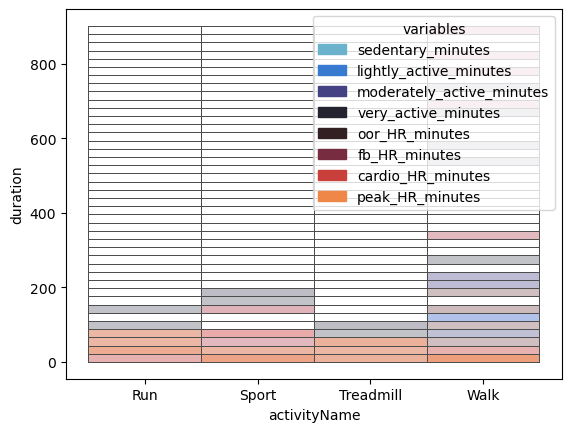

In [42]:
# Experiment 1

# Reverse the order of variables, add x to ['activityName', 'yearmonth']
sns.histplot(data=e_total_melt, 
    x='activityName', y='duration', hue='variables', multiple='stack', 
    palette='icefire', edgecolor='.3', linewidth=.5) #._legend.remove()

In [43]:
e_total_melt_active_mins = e_total_melt[e_total_melt['variables'].isin(active_mins_cols)]
e_total_melt_HR_zones    = e_total_melt[e_total_melt['variables'].isin(HR_zones_cols)]

<Axes: xlabel='activityName,yearmonth'>

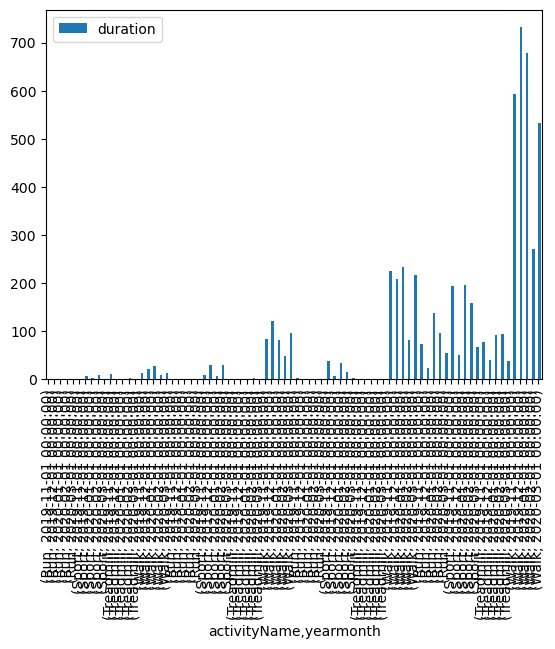

In [44]:
# Experiment 2
e_act = e_total_melt_active_mins.set_index(['activityName', 'yearmonth'])

fig, ax = plt.subplots()

e_act.plot(kind='bar', stacked=True, width=0.4, ax=ax, position=0)

In [45]:
# Experiment 3
e_total_unstack = (e_stats
    .drop('dateTime', axis=1)
    .groupby(['activityName', 'yearmonth'])
    .agg('sum').unstack()
)
e_total_unstack

sedentary_minutes                                              \
yearmonth           2019-11-01 2019-12-01 2020-01-01 2020-02-01 2020-03-01   
activityName                                                                 
Run                          0          0          0          0          0   
Sport                        0          6          3          8          0   
Treadmill                   11          0          0          2          0   
Walk                        13         22         27          8         12   

             lightly_active_minutes                                   \
yearmonth                2019-11-01 2019-12-01 2020-01-01 2020-02-01   
activityName                                                           
Run                               0          0          0          1   
Sport                             8         29          6         29   
Treadmill                         1          0          0          2   
Walk                             84        121         81         48   

                        moderately_active_minutes                        \
yearmonth    2020-03-01                2019-11-01 2019-12-01 2020-01-01   
activityName                                                              
Run                   0                         2          0          0   
Sport                 1                        38          6         33   
Treadmill             0                         0          0          0   
Walk                 96                       225        208        233   

                                   very_active_minutes                        \
yearmonth    2020-02-01 2020-03-01          2019-11-01 2019-12-01 2020-01-01   
activityName                                                                   
Run                   0          0                  74         24        138   
Sport                15          3                 194         50        195   
Treadmill             1          0                  77         40         91   
Walk                 81        217                 593        732        678   

                                   oor_HR_minutes                        \
yearmonth    2020-02-01 2020-03-01     2019-11-01 2019-12-01 2020-01-01   
activityName                                                              
Run                  96         54              0          0          0   
Sport               159         68              5         15          6   
Treadmill            95         37             12          0          0   
Walk                270        532             96        149        192   

                                   fb_HR_minutes                        \
yearmonth    2020-02-01 2020-03-01    2019-11-01 2019-12-01 2020-01-01   
activityName                                                             
Run                   1          0             7          0          8   
Sport                18          0           132         50        135   
Treadmill             3          0             3          8          6   
Walk                 59        137           784        902        824   

                                   cardio_HR_minutes                        \
yearmonth    2020-02-01 2020-03-01        2019-11-01 2019-12-01 2020-01-01   
activityName                                                                 
Run                  12          1                25          1         43   
Sport                79         24                86         23         78   
Treadmill            19          4                31         15         28   
Walk                333        682                24         17         11   

                                   peak_HR_minutes                        \
yearmonth    2020-02-01 2020-03-01      2019-11-01 2019-12-01 2020-01-01   
activityName                                                               
Run                  25         13              43    

In [46]:
e_total_unstack.dtypes

                           yearmonth 
sedentary_minutes          2019-11-01    int64
                           2019-12-01    int64
                           2020-01-01    int64
                           2020-02-01    int64
                           2020-03-01    int64
lightly_active_minutes     2019-11-01    int64
                           2019-12-01    int64
                           2020-01-01    int64
                           2020-02-01    int64
                           2020-03-01    int64
moderately_active_minutes  2019-11-01    int64
                           2019-12-01    int64
                           2020-01-01    int64
                           2020-02-01    int64
                           2020-03-01    int64
very_active_minutes        2019-11-01    int64
                           2019-12-01    int64
                           2020-01-01    int64
                           2020-02-01    int64
                           2020-03-01    int64
oor_HR_minutes        

Text(0, 0.5, 'duration (mins)')

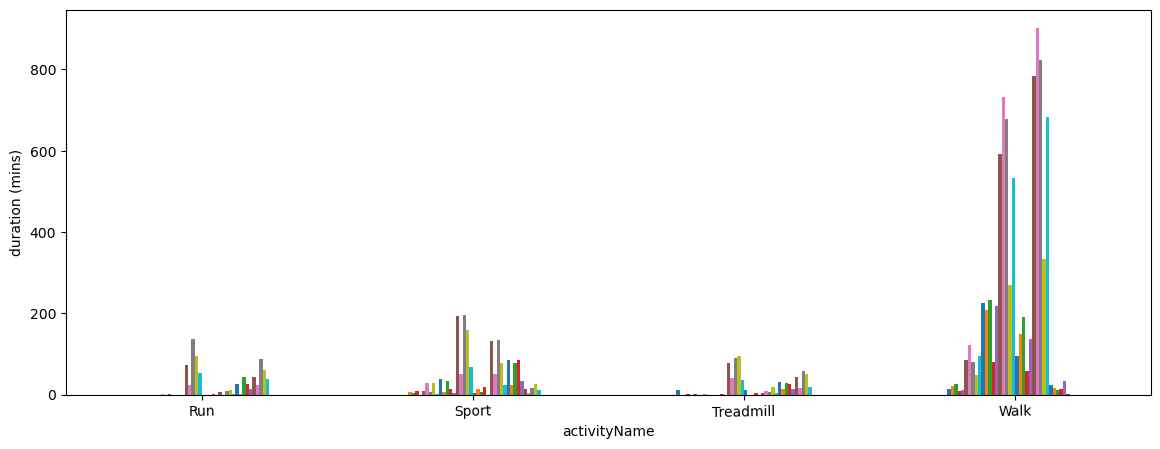

In [47]:
# How to delete index `yearmonth`
fig, ax = plt.subplots(figsize=(14, 5))

e_total_unstack.plot(kind='bar', rot=True, ax=ax)
ax.get_legend().remove()
ax.set_ylabel('duration (mins)')

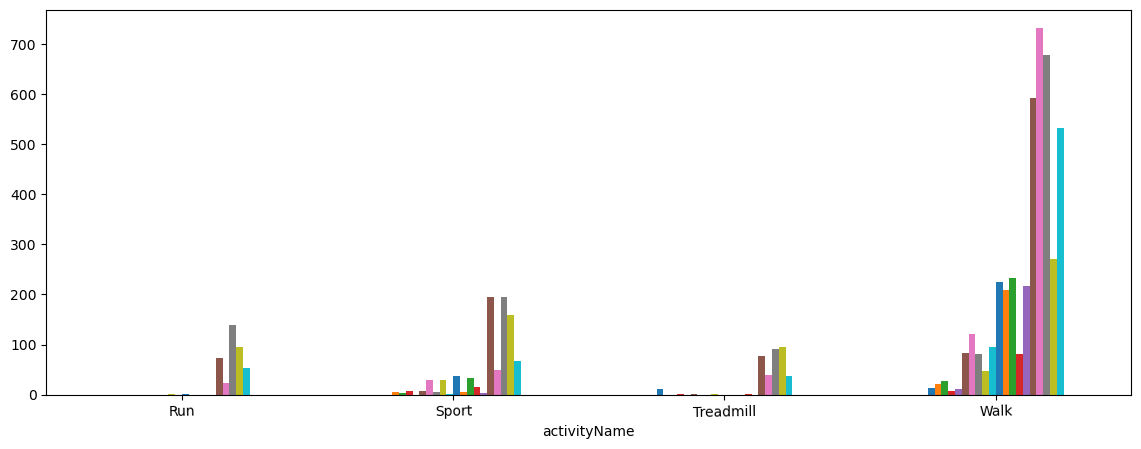

In [48]:
fig, ax = plt.subplots(figsize=(14, 5))
e_total_unstack[active_mins_cols].plot(kind='bar', rot=True, ax=ax)
ax.get_legend().remove()

In [49]:
e_total_indexed = e_stats.drop('dateTime', axis=1).groupby(['activityName', 'yearmonth']).agg('sum')
e_total_indexed

sedentary_minutes  lightly_active_minutes  \
activityName yearmonth                                               
Run          2019-11-01                  0                       0   
             2019-12-01                  0                       0   
             2020-01-01                  0                       0   
             2020-02-01                  0                       1   
             2020-03-01                  0                       0   
Sport        2019-11-01                  0                       8   
             2019-12-01                  6                      29   
             2020-01-01                  3                       6   
             2020-02-01                  8                      29   
             2020-03-01                  0                       1   
Treadmill    2019-11-01                 11                       1   
             2019-12-01                  0                       0   
             2020-01-01                  0                       0   
             2020-02-01                  2                       2   
             2020-03-01                  0                       0   
Walk         2019-11-01                 13                      84   
             2019-12-01                 22                     121   
             2020-01-01                 27                      81   
             2020-02-01                  8                      48   
             2020-03-01                 12                      96   

                         moderately_active_minutes  very_active_minutes  \
activityName yearmonth                                                    
Run          2019-11-01                          2                   74   
             2019-12-01                          0                   24   
             2020-01-01                          0                  138   
             2020-02-01                          0                   96   
             2020-03-01                          0                   54   
Sport        2019-11-01                         38                  194   
             2019-12-01                          6                   50   
             2020-01-01                         33                  195   
             2020-02-01                         15                  159   
             2020-03-01                          3                   68   
Treadmill    2019-11-01                          0                   77   
             2019-12-01                          0                   40   
             2020-01-01                          0                   91   
             2020-02-01                          1                   95   
             2020-03-01                          0                   37   
Walk         2019-11-01                        225                  593   
             2019-12-01                        208                  732   
             2020-01-01                        233                  678   
             2020-02-01                         81                  270   
             2020-03-01                        217                  532   

                         oor_HR_minutes  fb_HR_minutes  cardio_HR_minutes  \
activityName yearmonth                                                      
Run          2019-11-01               0              7                 25   
             2019-12-01               0              0                  1   
             2020-01-01               0              8                 43   
             2020-02-01               1             12                 25   
             2020-03-01               0              1                 13   
Sport        2019-11-01               5            132                 86   
             2019-12-01              15             50                 23   
             2020-01-01               6            135                 78   
             2020-02-01              18             79         

In [50]:
active_mins_color = ['lightseagreen', 'mediumseagreen', 'seagreen', 'darkgreen']
HR_zones_color    = ['lightsalmon', 'orangered', 'red', 'darkred']

In [51]:
e_total

,activityName,yearmonth,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,oor_HR_minutes,fb_HR_minutes,cardio_HR_minutes,peak_HR_minutes
0,Run,2019-11-01,0,0,2,74,0,7,25,43
1,Run,2019-12-01,0,0,0,24,0,0,1,23
2,Run,2020-01-01,0,0,0,138,0,8,43,87
3,Run,2020-02-01,0,1,0,96,1,12,25,60
4,Run,2020-03-01,0,0,0,54,0,1,13,39
5,Sport,2019-11-01,0,8,38,194,5,132,86,14
6,Sport,2019-12-01,6,29,6,50,15,50,23,4
7,Sport,2020-01-01,3,6,33,195,6,135,78,17
8,Sport,2020-02-01,8,29,15,159,18,79,85,25
9,Sport,2020-03-01,0,1,3,68,0,24,34,12


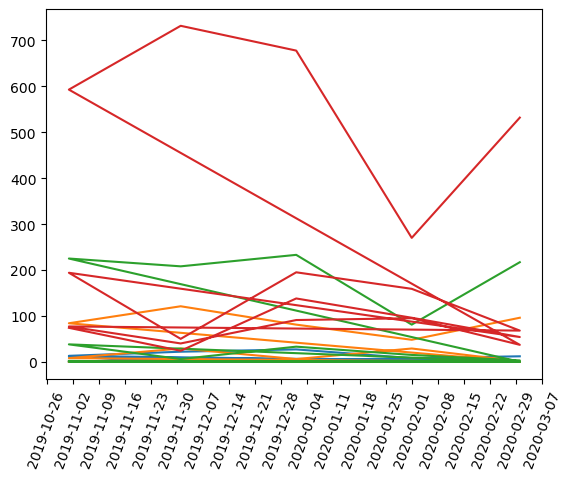

In [52]:
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

_ = plt.plot(e_total['yearmonth'], e_total[active_mins_cols])
_ = plt.xticks(rotation=70)

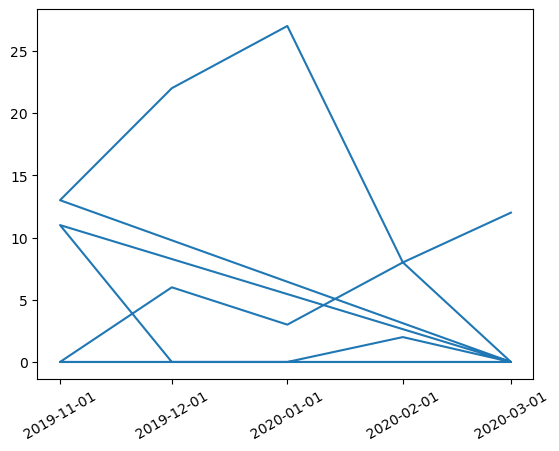

In [53]:
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

_ = plt.plot(e_total['yearmonth'], e_total['sedentary_minutes'])
_ = plt.xticks(rotation=30)

<Axes: xlabel='activityName,yearmonth'>

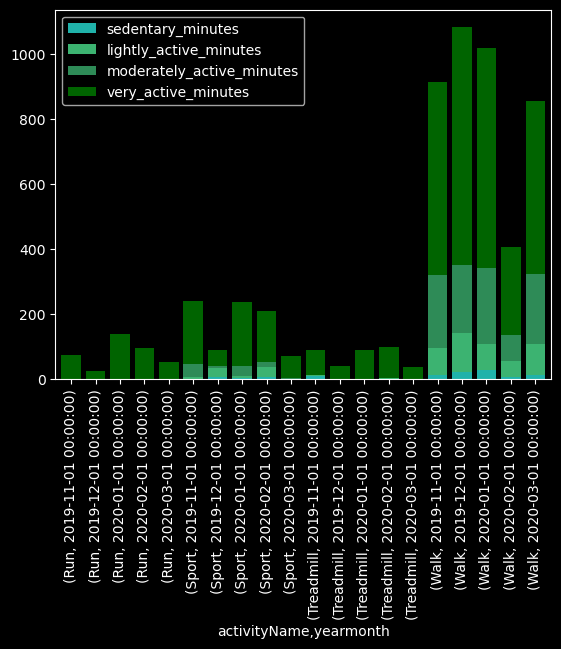

In [54]:
## Experiment 4, looks good!
plt.style.use('dark_background')

fig, ax = plt.subplots()

e_total_indexed[active_mins_cols].plot(
    kind='bar', stacked=True, width=0.8, ax=ax,
    color=active_mins_color)

Text(0.5, 1.0, 'Heart Rate Zones at Sports (in mins')

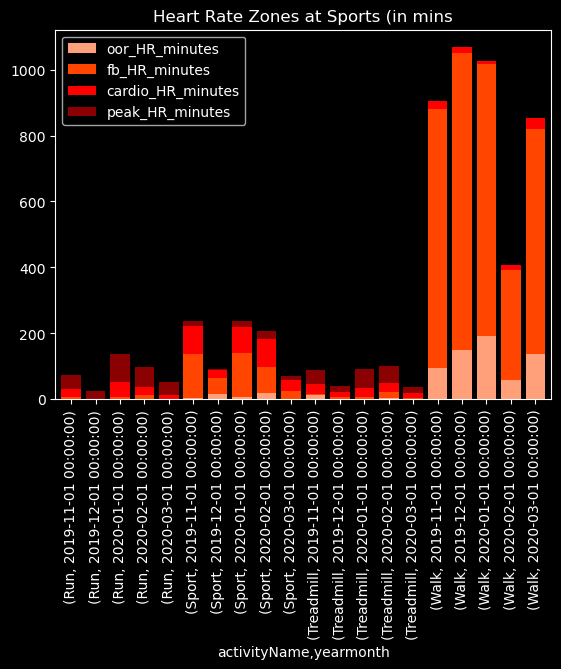

In [55]:
fig, ax = plt.subplots()

# ax = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax = plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

e_total_indexed[HR_zones_cols].plot(
    kind='bar', stacked=True, width=0.8, 
    color=HR_zones_color, ax=ax)
plt.title('Heart Rate Zones at Sports (in mins')
# plt.xticks(rotation=45)

<Axes: xlabel='activityName,yearmonth'>

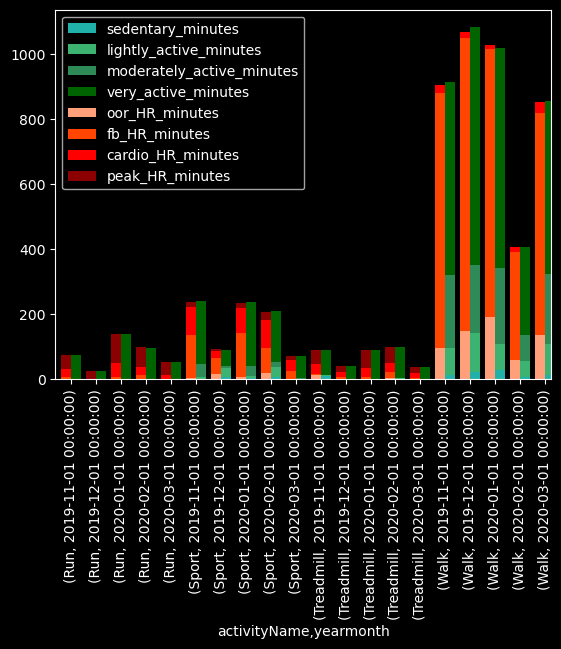

In [56]:
## Testing if we could cram the 2 charts. Would rather separate.

fig, ax = plt.subplots()

e_total_indexed[active_mins_cols].plot(
    kind='bar', stacked=True, width=0.4, ax=ax,
    color=active_mins_color, position=0)
e_total_indexed[HR_zones_cols].plot(
    kind='bar', stacked=True, width=0.4, ax=ax,
    color=HR_zones_color, position=1)

#### Whole: `pXX`

#### `time_in_heart_rate_zones`

#### Sample: `p01`

In [57]:
hrz_in_mins = pd.read_json("p01/fitbit/time_in_heart_rate_zones.json")
hrz_in_mins

,dateTime,value
0,2019-11-01,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1254.0, 'IN_DEFAULT_ZONE_1': 164.0, 'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_2': 3.0}}"
1,2019-11-02,"{'valuesInZones': {'IN_DEFAULT_ZONE_2': 0.0, 'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_1': 137.0, 'BELOW_DEFAULT_ZONE_1': 1262.0}}"
2,2019-11-03,"{'valuesInZones': {'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_1': 141.0, 'IN_DEFAULT_ZONE_2': 0.0, 'BELOW_DEFAULT_ZONE_1': 1218.0}}"
3,2019-11-04,"{'valuesInZones': {'IN_DEFAULT_ZONE_1': 100.0, 'BELOW_DEFAULT_ZONE_1': 1315.0, 'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_2': 0.0}}"
4,2019-11-05,"{'valuesInZones': {'IN_DEFAULT_ZONE_2': 7.0, 'IN_DEFAULT_ZONE_3': 12.0, 'IN_DEFAULT_ZONE_1': 94.0, 'BELOW_DEFAULT_ZONE_1': 1300.0}}"
...,...,...
147,2020-03-27,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1347.0, 'IN_DEFAULT_ZONE_2': 3.0, 'IN_DEFAULT_ZONE_1': 82.0, 'IN_DEFAULT_ZONE_3': 0.0}}"
148,2020-03-28,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1232.0, 'IN_DEFAULT_ZONE_1': 173.0, 'IN_DEFAULT_ZONE_2': 5.0, 'IN_DEFAULT_ZONE_3': 0.0}}"
149,2020-03-29,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1319.0, 'IN_DEFAULT_ZONE_1': 49.0, 'IN_DEFAULT_ZONE_2': 0.0, 'IN_DEFAULT_ZONE_3': 0.0}}"
150,2020-03-30,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1384.0, 'IN_DEFAULT_ZONE_2': 2.0, 'IN_DEFAULT_ZONE_1': 23.0, 'IN_DEFAULT_ZONE_3': 0.0}}"


In [58]:
## Column names following the sequence
col_names = ['dateTime', 
    'HRZ_oor_in_minutes', 'HRZ_fb_in_minutes', 
    'HRZ_cardio_in_minutes', 'HRZ_peak_in_minutes']

hrz_in_mins = (hrz_in_mins
   .join(pd.json_normalize(hrz_in_mins['value']))
   .drop('value', axis=1)).sort_index(axis=1)
hrz_in_mins.columns = col_names

# hrz_in_mins = hrz_in_mins.set_index('dateTime')
hrz_in_mins

,dateTime,HRZ_oor_in_minutes,HRZ_fb_in_minutes,HRZ_cardio_in_minutes,HRZ_peak_in_minutes
0,2019-11-01,1254.0,164.0,3.0,0.0
1,2019-11-02,1262.0,137.0,0.0,0.0
2,2019-11-03,1218.0,141.0,0.0,0.0
3,2019-11-04,1315.0,100.0,0.0,0.0
4,2019-11-05,1300.0,94.0,7.0,12.0
...,...,...,...,...,...
147,2020-03-27,1347.0,82.0,3.0,0.0
148,2020-03-28,1232.0,173.0,5.0,0.0
149,2020-03-29,1319.0,49.0,0.0,0.0
150,2020-03-30,1384.0,23.0,2.0,0.0


#### Attempts on Visuals

<Axes: xlabel='dateTime'>

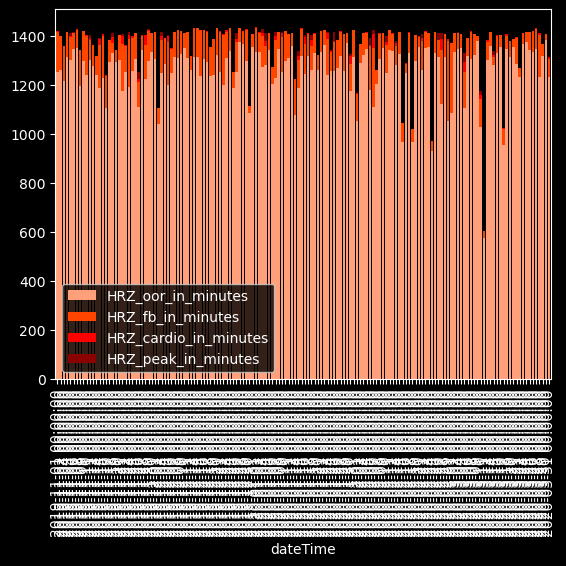

In [59]:
## Experiment 1: Visuals by day, multiple stacked chart.

## Result: Would rather group it by each week;
##   it'd be more neat and intuitive if a user
##   would trace back their days.

fig, ax = plt.subplots()

hrz_in_mins.set_index('dateTime').plot(
    kind='bar', stacked=True, width=0.8, ax=ax, color=HR_zones_color)

In [60]:
hrz_in_mins.dtypes

dateTime                 datetime64[ns]
HRZ_oor_in_minutes              float64
HRZ_fb_in_minutes               float64
HRZ_cardio_in_minutes           float64
HRZ_peak_in_minutes             float64
dtype: object

In [61]:
# The data starts on Friday. To include the whole week,
# Data are grouped weekly starting on Thursday. So 'W-THU'

hrz_weekly = hrz_in_mins.groupby([pd.Grouper
        (key='dateTime', freq='W-Thu')]).agg('sum')

In [62]:
hrz_weekly

,HRZ_oor_in_minutes,HRZ_fb_in_minutes,HRZ_cardio_in_minutes,HRZ_peak_in_minutes
dateTime,,,,
2019-11-07,9049.0,771.0,14.0,18.0
2019-11-14,8738.0,847.0,45.0,18.0
2019-11-21,8730.0,773.0,72.0,26.0
2019-11-28,8687.0,842.0,76.0,41.0
2019-12-05,8709.0,795.0,51.0,22.0
2019-12-12,9124.0,629.0,5.0,0.0
2019-12-19,8941.0,931.0,4.0,0.0
2019-12-26,8860.0,867.0,31.0,24.0
2020-01-02,9150.0,499.0,7.0,0.0


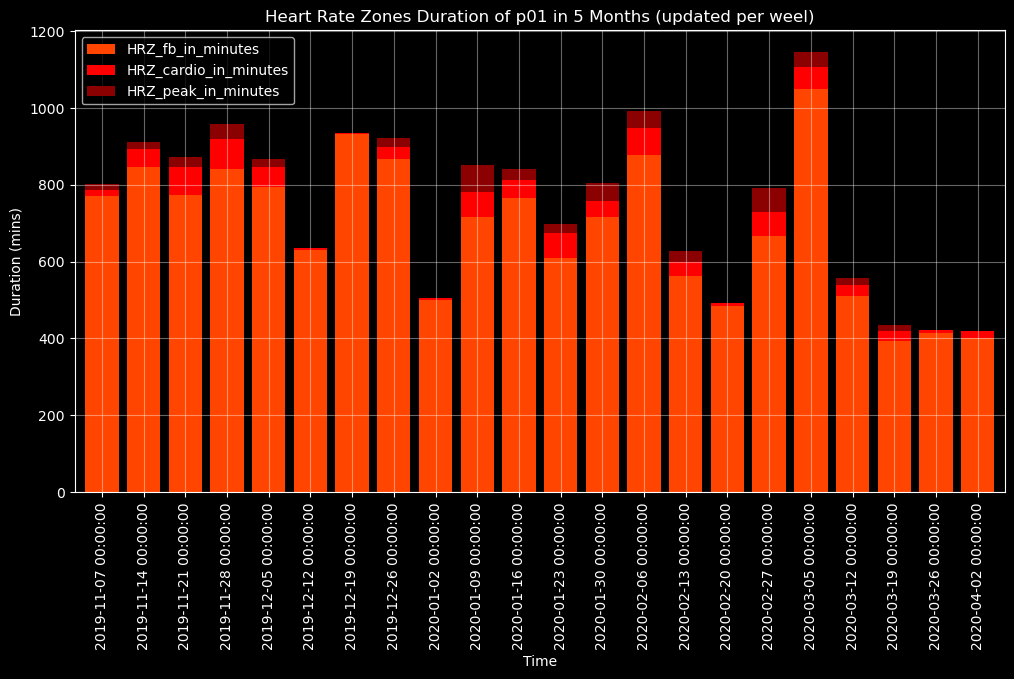

In [63]:
## Experiment 2: Chart by weekly, no OOR
## looking good, intuitive insights!

fig, ax = plt.subplots(figsize=(12, 6))

hrz_weekly.drop('HRZ_oor_in_minutes', axis=1).plot(
    kind='bar', stacked=True, width=0.8, ax=ax, color=HR_zones_color[1:])
ax.set_title('Heart Rate Zones Duration of p01 in 5 Months (updated per weel)')
ax.set_xlabel('Time')
ax.set_ylabel('Duration (mins)')
ax.grid(alpha=0.4)

# ax.figure.autofmt_xdate(rotation=45, ha='center')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))


In [64]:
HR_zones_color_update = ['#FFFF7D', '#FF9D1C', '#FF6D1C', '#FE251B']

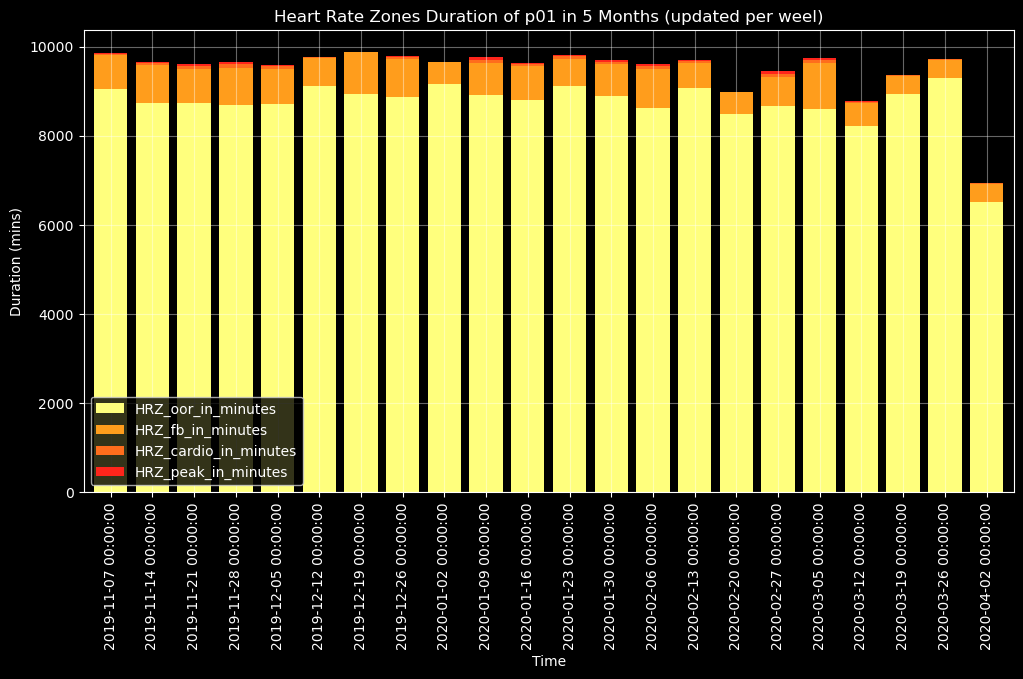

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))

hrz_weekly.plot(kind='bar', stacked=True, 
                width=0.8, ax=ax, color=HR_zones_color_update)
ax.set_title('Heart Rate Zones Duration of p01 in 5 Months (updated per weel)')
ax.set_xlabel('Time')
ax.set_ylabel('Duration (mins)')
ax.grid(alpha=0.4)

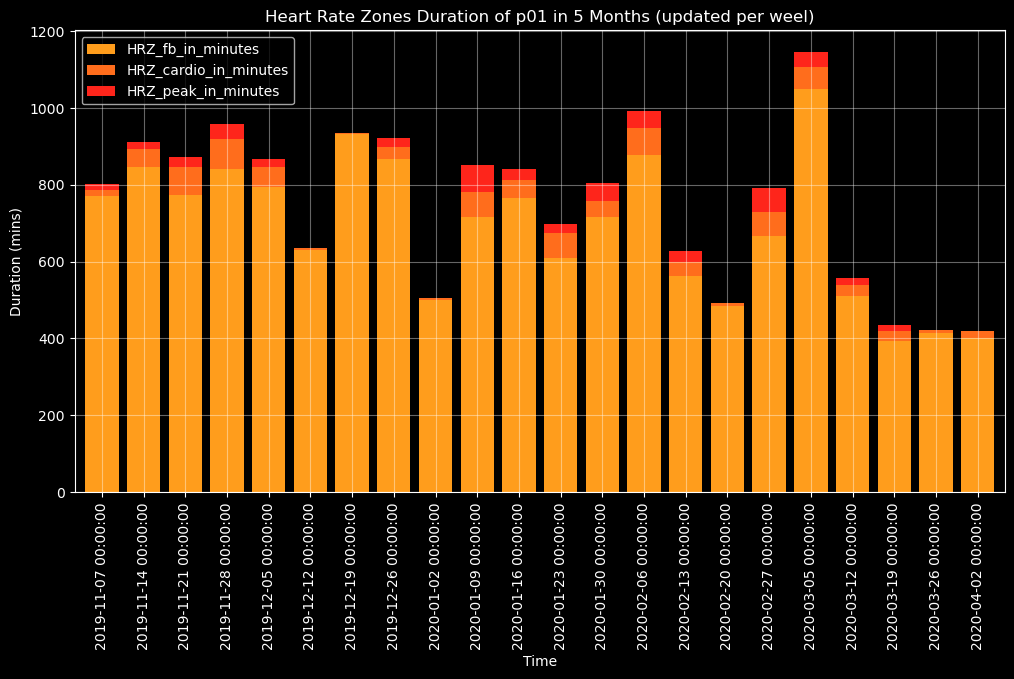

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))

hrz_weekly.drop('HRZ_oor_in_minutes', axis=1).plot(
    kind='bar', stacked=True, width=0.8, ax=ax, color=HR_zones_color_update[1:])
ax.set_title('Heart Rate Zones Duration of p01 in 5 Months (updated per weel)')
ax.set_xlabel('Time')
ax.set_ylabel('Duration (mins)')
ax.grid(alpha=0.4)

#### Whole: `pXX`

### `XX_minutes`

#### `sedentary_minutes`

In [67]:
sms = pd.read_json("p01/fitbit/sedentary_minutes.json")
sms = sms.rename(columns={'value': 'sedentary_minutes'})
sms

,dateTime,sedentary_minutes
0,2019-11-01,636
1,2019-11-02,709
2,2019-11-03,648
3,2019-11-04,760
4,2019-11-05,737
...,...,...
147,2020-03-27,821
148,2020-03-28,679
149,2020-03-29,840
150,2020-03-30,842


#### `lightly_active_minutes`

In [68]:
lams = pd.read_json("p01/fitbit/lightly_active_minutes.json")
lams = lams.rename(columns={'value': 'lightly_active_minutes'})
lams

,dateTime,lightly_active_minutes
0,2019-11-01,245
1,2019-11-02,202
2,2019-11-03,262
3,2019-11-04,230
4,2019-11-05,263
...,...,...
147,2020-03-27,181
148,2020-03-28,207
149,2020-03-29,145
150,2020-03-30,161


#### `moderately_active_minutes`

In [69]:
mams = pd.read_json("p01/fitbit/moderately_active_minutes.json")
mams = mams.rename(columns={'value': 'moderatively_active_minutes'})
mams

,dateTime,moderatively_active_minutes
0,2019-11-01,58
1,2019-11-02,43
2,2019-11-03,63
3,2019-11-04,23
4,2019-11-05,22
...,...,...
147,2020-03-27,28
148,2020-03-28,69
149,2020-03-29,19
150,2020-03-30,6


#### `very_active_minutes`

In [70]:
vams = pd.read_json("p01/fitbit/very_active_minutes.json")
vams = vams.rename(columns={'value': 'very_active_minutes'})
vams

,dateTime,very_active_minutes
0,2019-11-01,72
1,2019-11-02,56
2,2019-11-03,45
3,2019-11-04,28
4,2019-11-05,56
...,...,...
147,2020-03-27,65
148,2020-03-28,83
149,2020-03-29,22
150,2020-03-30,8


### `steps`

In [71]:
steps = pd.read_json("p01/fitbit/steps.json")
steps['date'] = steps['dateTime'].dt.date
steps

,dateTime,value,date
0,2019-11-01 00:00:00,0,2019-11-01
1,2019-11-01 00:01:00,0,2019-11-01
2,2019-11-01 00:02:00,0,2019-11-01
3,2019-11-01 00:03:00,0,2019-11-01
4,2019-11-01 00:04:00,0,2019-11-01
...,...,...,...
218831,2020-03-31 23:55:00,0,2020-03-31
218832,2020-03-31 23:56:00,0,2020-03-31
218833,2020-03-31 23:57:00,0,2020-03-31
218834,2020-03-31 23:58:00,0,2020-03-31


In [72]:
steps_per_day = (steps.drop('dateTime', axis=1)
    .groupby('date').agg('sum').reset_index()
    .rename(columns={'date': 'dateTime', 'value':'num_steps'})
)
steps_per_day

,dateTime,num_steps
0,2019-11-01,17873
1,2019-11-02,13118
2,2019-11-03,14312
3,2019-11-04,10970
4,2019-11-05,16186
...,...,...
147,2020-03-27,11532
148,2020-03-28,16448
149,2020-03-29,6698
150,2020-03-30,4761


### `active_steps`

In [73]:
active_dfs = [steps_per_day, sms, lams, mams, vams]

active_steps = pd.concat(active_dfs, join='outer', axis=1)
active_steps = active_steps.loc[:, ~active_steps.columns.duplicated()]
active_steps['dateTime'] = pd.to_datetime(active_steps['dateTime'])
active_steps

,dateTime,num_steps,sedentary_minutes,lightly_active_minutes,moderatively_active_minutes,very_active_minutes
0,2019-11-01,17873,636,245,58,72
1,2019-11-02,13118,709,202,43,56
2,2019-11-03,14312,648,262,63,45
3,2019-11-04,10970,760,230,23,28
4,2019-11-05,16186,737,263,22,56
...,...,...,...,...,...,...
147,2020-03-27,11532,821,181,28,65
148,2020-03-28,16448,679,207,69,83
149,2020-03-29,6698,840,145,19,22
150,2020-03-30,4761,842,161,6,8


In [74]:
active_steps.dtypes

dateTime                       datetime64[ns]
num_steps                               int64
sedentary_minutes                       int64
lightly_active_minutes                  int64
moderatively_active_minutes             int64
very_active_minutes                     int64
dtype: object

In [75]:
# The data starts on Friday. To include the whole week,
# Data are grouped weekly starting on Thursday. So 'W-THU'

active_mins_weekly = active_steps.groupby([pd.Grouper
        (key='dateTime', freq='W-Thu')]).agg('sum').reset_index()
active_mins_weekly

,dateTime,num_steps,sedentary_minutes,lightly_active_minutes,moderatively_active_minutes,very_active_minutes
0,2019-11-07,89358,5205,1590,230,283
1,2019-11-14,100497,5097,1626,209,436
2,2019-11-21,90718,5284,1488,222,439
3,2019-11-28,105159,4957,1586,231,497
4,2019-12-05,101072,5146,1741,235,411
5,2019-12-12,80618,5175,1753,168,249
6,2019-12-19,109215,4780,1984,239,413
7,2019-12-26,108278,4236,2130,288,455
8,2020-01-02,80175,4488,2097,129,207
9,2020-01-09,95324,5111,1359,180,515


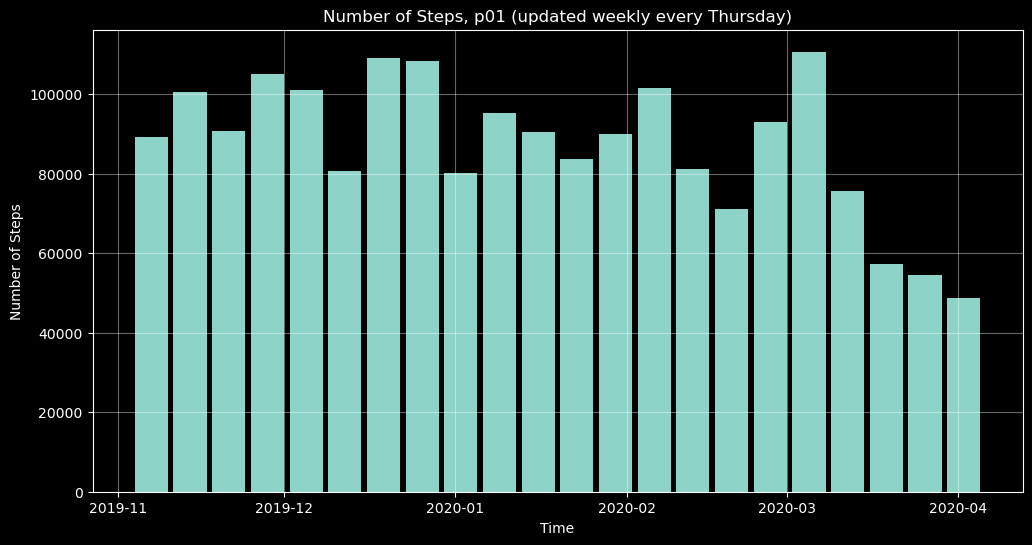

In [76]:
## Suggestion: Make a threshold -- up: red, down: blue

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(active_mins_weekly['dateTime'], 
       active_mins_weekly['num_steps'], width=6)
ax.set_title('Number of Steps, p01 (updated weekly every Thursday)')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Steps')
ax.grid(alpha=0.4)

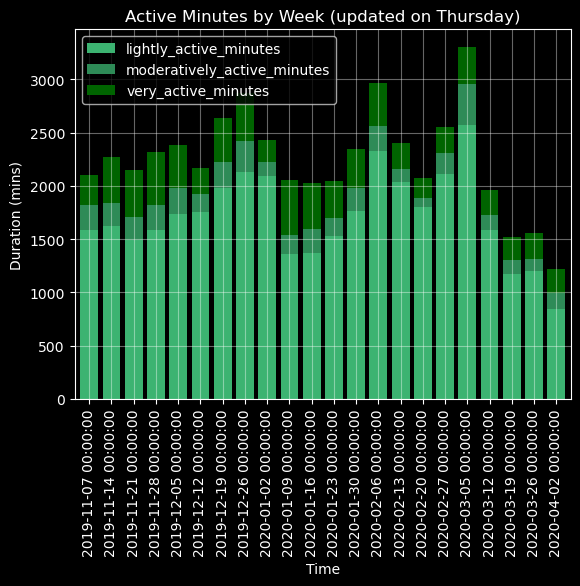

In [77]:
fig, ax = plt.subplots()

active_mins_weekly.drop(['num_steps', 'sedentary_minutes'], axis=1).plot('dateTime',
    kind='bar', stacked=True, width=0.8, ax=ax, color=active_mins_color[1:])
ax.set_title('Active Minutes by Week (updated on Thursday)')
ax.set_xlabel('Time')
ax.set_ylabel('Duration (mins)')
ax.grid(alpha=0.4)

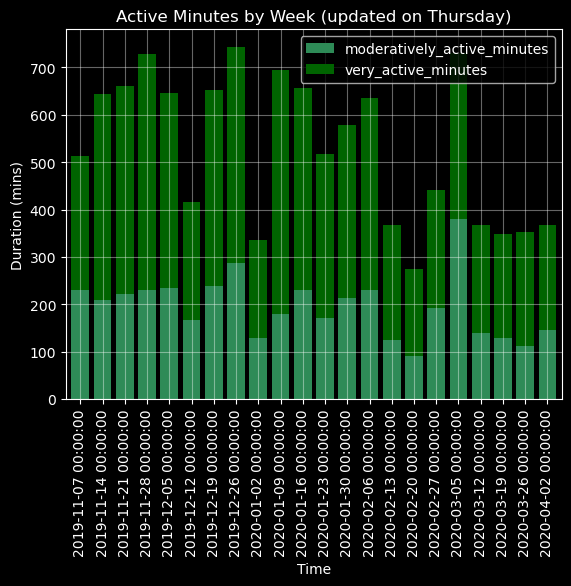

In [78]:
fig, ax = plt.subplots()

active_mins_weekly.drop(
    ['num_steps', 'sedentary_minutes', 'lightly_active_minutes'], axis=1).plot('dateTime',
    kind='bar', stacked=True, width=0.8, ax=ax, color=active_mins_color[2:])
ax.set_title('Active Minutes by Week (updated on Thursday)')
ax.set_xlabel('Time')
ax.set_ylabel('Duration (mins)')
ax.grid(alpha=0.4)

### Heart Rates

#### `heart_rate`

In [79]:
HR = pd.read_json("p01/fitbit/heart_rate.json")
HR

,dateTime,value
0,2019-11-01 00:00:05,"{'bpm': 54, 'confidence': 3}"
1,2019-11-01 00:00:10,"{'bpm': 52, 'confidence': 3}"
2,2019-11-01 00:00:20,"{'bpm': 51, 'confidence': 3}"
3,2019-11-01 00:00:25,"{'bpm': 52, 'confidence': 3}"
4,2019-11-01 00:00:30,"{'bpm': 51, 'confidence': 3}"
...,...,...
1573160,2020-03-31 23:59:18,"{'bpm': 55, 'confidence': 3}"
1573161,2020-03-31 23:59:23,"{'bpm': 54, 'confidence': 3}"
1573162,2020-03-31 23:59:33,"{'bpm': 56, 'confidence': 3}"
1573163,2020-03-31 23:59:48,"{'bpm': 56, 'confidence': 3}"


In [80]:
HR = (HR.join(pd.json_normalize(HR['value']))
        .drop('value', axis=1)
        .rename(columns={'bpm':'hr_bpm'}))
HR

,dateTime,hr_bpm,confidence
0,2019-11-01 00:00:05,54,3
1,2019-11-01 00:00:10,52,3
2,2019-11-01 00:00:20,51,3
3,2019-11-01 00:00:25,52,3
4,2019-11-01 00:00:30,51,3
...,...,...,...
1573160,2020-03-31 23:59:18,55,3
1573161,2020-03-31 23:59:23,54,3
1573162,2020-03-31 23:59:33,56,3
1573163,2020-03-31 23:59:48,56,3


In [81]:
HR[:17]

,dateTime,hr_bpm,confidence
0,2019-11-01 00:00:05,54,3
1,2019-11-01 00:00:10,52,3
2,2019-11-01 00:00:20,51,3
3,2019-11-01 00:00:25,52,3
4,2019-11-01 00:00:30,51,3
5,2019-11-01 00:00:35,52,3
6,2019-11-01 00:00:45,53,3
7,2019-11-01 00:00:50,56,3
8,2019-11-01 00:00:55,54,3
9,2019-11-01 00:01:00,53,3


In [82]:
HR.dtypes

dateTime      datetime64[ns]
hr_bpm                 int64
confidence             int64
dtype: object

In [83]:
## Chunking data into bits of 6-hours x 4 in one day,
## making a total data of 

HR_per_six_hour = HR.groupby(
    [pd.Grouper(key='dateTime', freq='6h')]).agg(
        ['mean', 'max', 'min']).reset_index()
# HR_per_six_hour['confidence'] = np.round(HR_per_six_hour['confidence'], 0)
HR_per_six_hour

dateTime     hr_bpm          confidence        
                              mean  max min       mean max min
0   2019-11-01 00:00:00  57.352319  121  47   2.770545   3   0
1   2019-11-01 06:00:00  66.877109  101  53   1.896185   3   1
2   2019-11-01 12:00:00  73.846928  140  47   1.800069   3   0
3   2019-11-01 18:00:00  65.141109  110  46   2.043212   3   0
4   2019-11-02 00:00:00  51.235637   80  46   2.919643   3   1
..                  ...        ...  ...  ..        ...  ..  ..
603 2020-03-30 18:00:00  57.494318   91  47   1.523864   3   1
604 2020-03-31 00:00:00  54.344924   91  47   2.470424   3   0
605 2020-03-31 06:00:00  63.810317  128  47   1.139172   3   0
606 2020-03-31 12:00:00  73.035879  140  52   1.099467   3   0
607 2020-03-31 18:00:00  58.663110   96  45   1.720274   3   1

[608 rows x 7 columns]

In [84]:
new_cols = ['datetime'] + ['_'.join(pair) for pair in HR_per_six_hour.columns[1:]]
HR_per_six_hour.columns = HR_per_six_hour.columns.droplevel(0)
HR_per_six_hour.columns = new_cols

HR_per_six_hour

,datetime,hr_bpm_mean,hr_bpm_max,hr_bpm_min,confidence_mean,confidence_max,confidence_min
0,2019-11-01 00:00:00,57.352319,121,47,2.770545,3,0
1,2019-11-01 06:00:00,66.877109,101,53,1.896185,3,1
2,2019-11-01 12:00:00,73.846928,140,47,1.800069,3,0
3,2019-11-01 18:00:00,65.141109,110,46,2.043212,3,0
4,2019-11-02 00:00:00,51.235637,80,46,2.919643,3,1
...,...,...,...,...,...,...,...
603,2020-03-30 18:00:00,57.494318,91,47,1.523864,3,1
604,2020-03-31 00:00:00,54.344924,91,47,2.470424,3,0
605,2020-03-31 06:00:00,63.810317,128,47,1.139172,3,0
606,2020-03-31 12:00:00,73.035879,140,52,1.099467,3,0


In [85]:
HR_per_six_hour = HR_per_six_hour.drop(['confidence_max', 'confidence_min'], axis=1)
HR_per_six_hour['confidence_mean'] = np.rint(HR_per_six_hour['confidence_mean'])
HR_per_six_hour

,datetime,hr_bpm_mean,hr_bpm_max,hr_bpm_min,confidence_mean
0,2019-11-01 00:00:00,57.352319,121,47,3.0
1,2019-11-01 06:00:00,66.877109,101,53,2.0
2,2019-11-01 12:00:00,73.846928,140,47,2.0
3,2019-11-01 18:00:00,65.141109,110,46,2.0
4,2019-11-02 00:00:00,51.235637,80,46,3.0
...,...,...,...,...,...
603,2020-03-30 18:00:00,57.494318,91,47,2.0
604,2020-03-31 00:00:00,54.344924,91,47,2.0
605,2020-03-31 06:00:00,63.810317,128,47,1.0
606,2020-03-31 12:00:00,73.035879,140,52,1.0


In [86]:
HR_per_six_hour.sort_values('confidence_mean')

,datetime,hr_bpm_mean,hr_bpm_max,hr_bpm_min,confidence_mean
483,2020-02-29 18:00:00,73.970054,139,52,1.0
461,2020-02-24 06:00:00,67.959024,121,52,1.0
462,2020-02-24 12:00:00,73.666964,110,56,1.0
463,2020-02-24 18:00:00,60.577999,119,47,1.0
465,2020-02-25 06:00:00,69.226976,115,50,1.0
...,...,...,...,...,...
204,2019-12-22 00:00:00,50.269829,73,45,3.0
480,2020-02-29 00:00:00,57.687896,79,50,3.0
336,2020-01-24 00:00:00,54.238206,100,45,3.0
516,2020-03-09 00:00:00,52.059984,101,33,3.0


#### Attempts on Visuals

In [87]:
## Experiment 1:
## In mind: bar-chart, min to max. Line plot, mean. 
## Confidence, color. 3: green, 2: gray, 1: red

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame
data = {
    'dateTime': pd.date_range(start='2023-01-01', periods=20, freq='6H'),
    'HR_min': [60 + i % 5 for i in range(20)],
    'HR_max': [100 + i % 10 for i in range(20)],
    'HR_avg': [80 + i % 7 for i in range(20)],
    'confidence': [3 if i % 5 != 0 else 2 for i in range(20)]  # Simulate confidence levels
}
df = pd.DataFrame(data)

In [89]:
df

,dateTime,HR_min,HR_max,HR_avg,confidence
0,2023-01-01 00:00:00,60,100,80,2
1,2023-01-01 06:00:00,61,101,81,3
2,2023-01-01 12:00:00,62,102,82,3
3,2023-01-01 18:00:00,63,103,83,3
4,2023-01-02 00:00:00,64,104,84,3
5,2023-01-02 06:00:00,60,105,85,2
6,2023-01-02 12:00:00,61,106,86,3
7,2023-01-02 18:00:00,62,107,80,3
8,2023-01-03 00:00:00,63,108,81,3
9,2023-01-03 06:00:00,64,109,82,3


In [90]:
conf_colors = {3: 'green', 2: 'gray', 1: 'red'}
bar_diffs   = HR_per_six_hour['hr_bpm_max'] - HR_per_six_hour['hr_bpm_min']
bar_colors  = HR_per_six_hour['confidence_mean'].map(conf_colors)

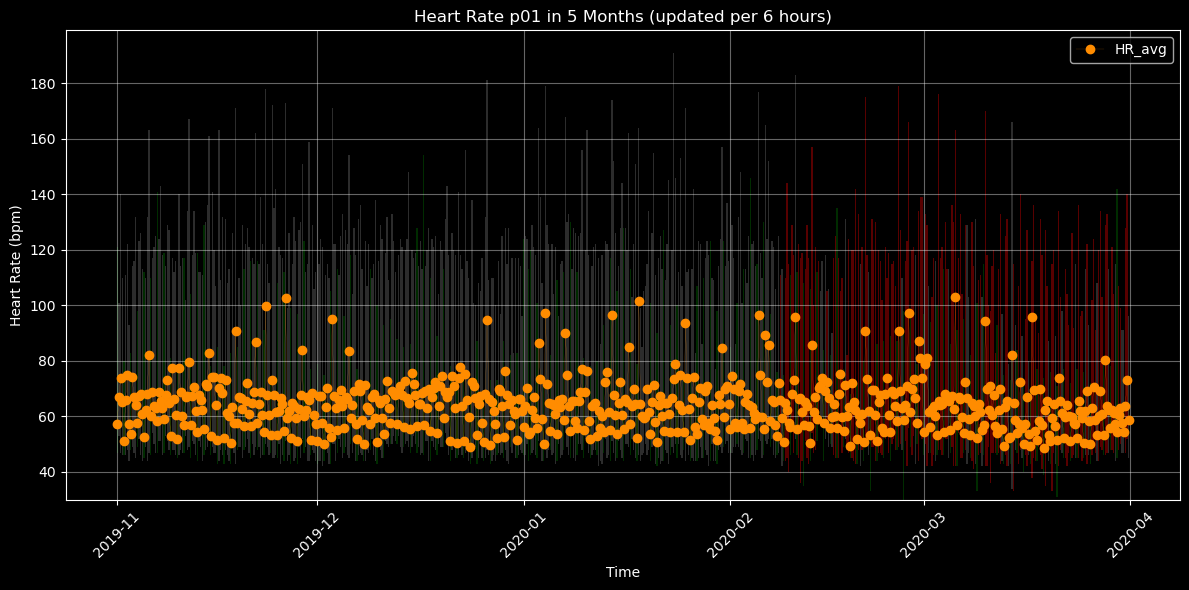

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(HR_per_six_hour['datetime'], bar_diffs,
    bottom = HR_per_six_hour['hr_bpm_min'], 
    color = bar_colors, alpha = 0.35, width = 0.2)

ax.plot(HR_per_six_hour['datetime'], HR_per_six_hour['hr_bpm_mean'],
    color = 'darkorange', linewidth = 0.1, marker = 'o', label = 'HR_avg')

ax.set_title('Heart Rate p01 in 5 Months (updated per 6 hours)')
ax.set_xlabel('Time')
ax.set_ylabel('Heart Rate (bpm)')
ax.grid(alpha=0.4)
ax.legend(['HR_avg'], loc='best')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
HR_per_six_hour.dtypes

datetime           datetime64[ns]
hr_bpm_mean               float64
hr_bpm_max                  int64
hr_bpm_min                  int64
confidence_mean           float64
dtype: object

In [93]:
## Experiment 1.1: Make it the latest 30 days (so last 120 rows)
## Code above are made into function for convenience.

from matplotlib.patches import Patch

def heart_rate_chart(days):

    fig, ax = plt.subplots(figsize=(12, 6))
    i_start = -1 * (4 * days + 1)
    # Add by one since last day only display 3 rows, not 4.
    
    ax.bar(HR_per_six_hour['datetime'][i_start:], bar_diffs[i_start:],
        bottom = HR_per_six_hour['hr_bpm_min'][i_start:], 
        color = bar_colors[i_start:], alpha = 0.6, width = 0.2)

    ax.plot(
        HR_per_six_hour['datetime'][i_start:], 
        HR_per_six_hour['hr_bpm_mean'][i_start:],
        color = 'white', linewidth = 1, 
        marker = 'o', label = 'HR_avg')

    ax.set_title(f'Heart Rate p01 in latest {days} days (updated per 6 hours)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Heart Rate (bpm)')
    ax.grid(alpha=0.4)
    
    legend_elements = [
        Patch(facecolor=conf_colors[3], edgecolor='none', alpha=0.5, label='Confidence = 3'),
        Patch(facecolor=conf_colors[2], edgecolor='none', alpha=0.5, label='Confidence = 2'),
        Patch(facecolor=conf_colors[1], edgecolor='none', alpha=0.5, label='Confidence = 1')
    ]
    
    ax.legend(handles = legend_elements + 
        [Patch(color='white', label='HR_avg')], loc='best')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

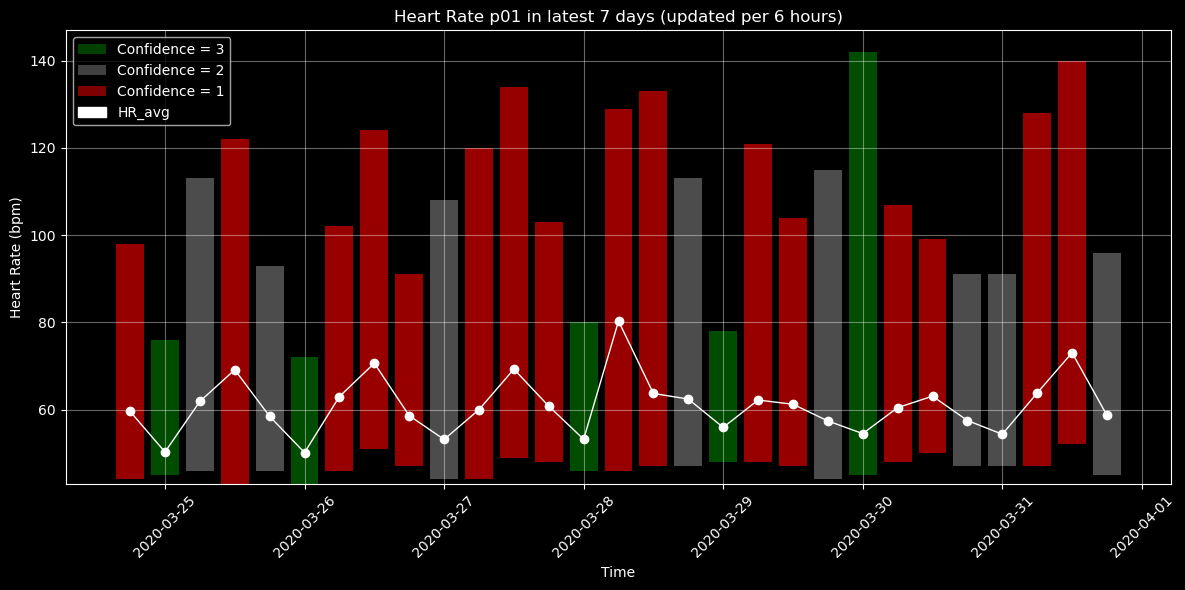

In [94]:
heart_rate_chart(7)

In [95]:
# Experiment 1.2:
# The measurement's correct, but since it's grouped
# from real-time to each 6 hours, HR fluctuates in active hours.

# Displaying three different colors would create misunderstandings,
# let's change colors to make grounds of confidence. Light to darker.

# conf_colors = {3: '#A7F25C', 2: '#5C7AF2', 1: '#F27E5C'}
# conf_colors = {3: '#B0FF61', 2: '#6181FF', 1: '#FF8561'}
# conf_colors = {3: '#A7F25C', 2: '#879D70', 1: '#3F4836'}
conf_colors = {3: '#91FF61', 2: '#88AA79', 1: '#465540'}

bar_colors  = HR_per_six_hour['confidence_mean'].map(conf_colors)

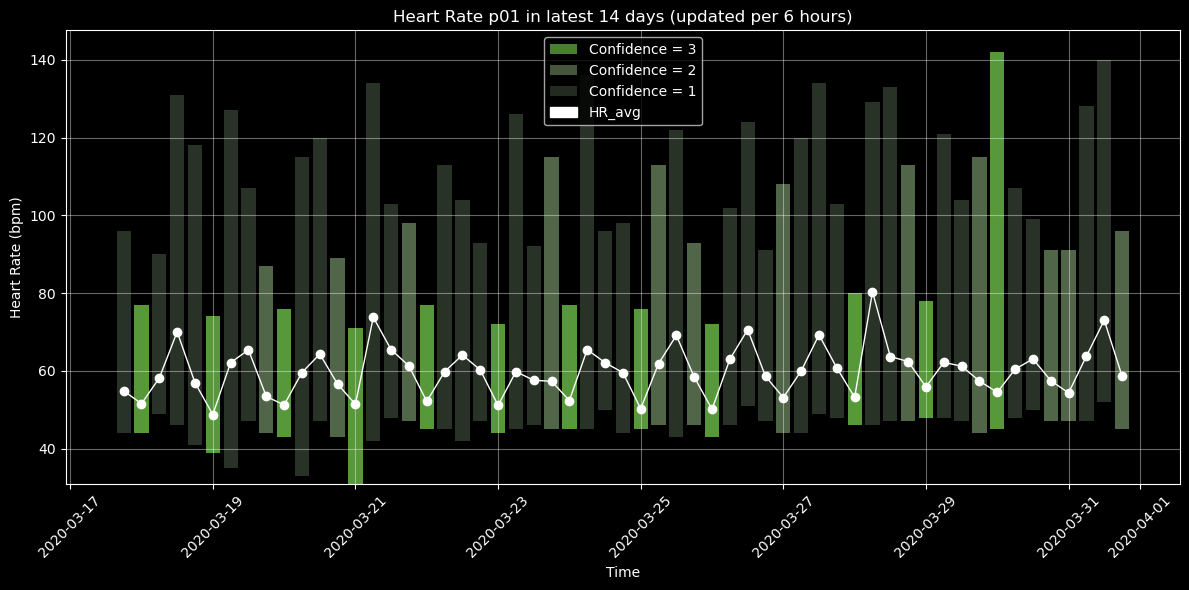

In [96]:
plt.style.use('dark_background')

heart_rate_chart(14)

#### `resting_heart_rate`

In [97]:
RHR = pd.read_json("p01/fitbit/resting_heart_rate.json")
RHR = RHR.rename(columns={"value": "rhr"})

In [98]:
RHR

,dateTime,rhr
0,2019-11-01,"{'date': '11/01/19', 'value': 53.74107360839844, 'error': 6.7911224365234375}"
1,2019-11-02,"{'date': '11/02/19', 'value': 52.881497383117676, 'error': 6.788424491882324}"
2,2019-11-03,"{'date': '11/03/19', 'value': 53.22202396392822, 'error': 6.787530899047852}"
3,2019-11-04,"{'date': '11/04/19', 'value': 54.31114101409912, 'error': 6.787234306335449}"
4,2019-11-05,"{'date': '11/05/19', 'value': 52.25911045074463, 'error': 6.787136077880859}"
...,...,...
147,2020-03-27,"{'date': '03/27/20', 'value': 50.23250770568848, 'error': 6.787087440490723}"
148,2020-03-28,"{'date': '03/28/20', 'value': 51.125173568725586, 'error': 6.787087440490723}"
149,2020-03-29,"{'date': '03/29/20', 'value': 53.07050037384033, 'error': 6.787087440490723}"
150,2020-03-30,"{'date': '03/30/20', 'value': 52.17508316040039, 'error': 6.787087440490723}"


In [99]:
RHR = (RHR.join(pd.json_normalize(RHR['rhr']))
          .drop(["rhr", "date"], axis=1)
          .rename(columns={
              "value": "resting_hr",
              "error": "error_std"}))

RHR

,dateTime,resting_hr,error_std
0,2019-11-01,53.741074,6.791122
1,2019-11-02,52.881497,6.788424
2,2019-11-03,53.222024,6.787531
3,2019-11-04,54.311141,6.787234
4,2019-11-05,52.259110,6.787136
...,...,...,...
147,2020-03-27,50.232508,6.787087
148,2020-03-28,51.125174,6.787087
149,2020-03-29,53.070500,6.787087
150,2020-03-30,52.175083,6.787087


In [100]:
RHR.sort_values('error_std', ascending=False)

,dateTime,resting_hr,error_std
32,2019-12-03,50.809428,14.019183
53,2019-12-24,52.049365,10.997471
31,2019-12-02,50.645761,10.946383
63,2020-01-03,51.822971,10.699983
26,2019-11-27,51.493073,10.699845
...,...,...,...
104,2020-02-13,51.069740,6.787087
103,2020-02-12,53.021011,6.787087
102,2020-02-11,52.532438,6.787087
101,2020-02-10,51.683936,6.787087


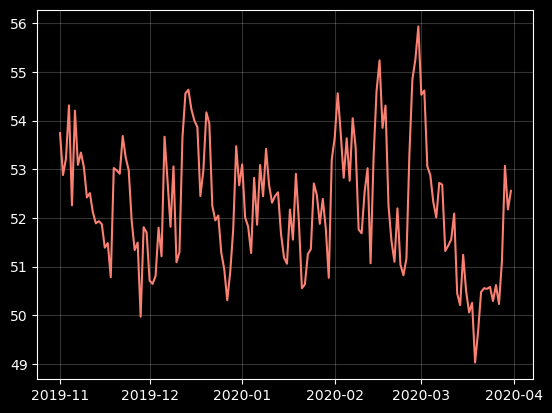

In [101]:
fig, ax = plt.subplots()

ax.plot(RHR['dateTime'], RHR['resting_hr'], color='salmon')
ax.grid(alpha=0.2)

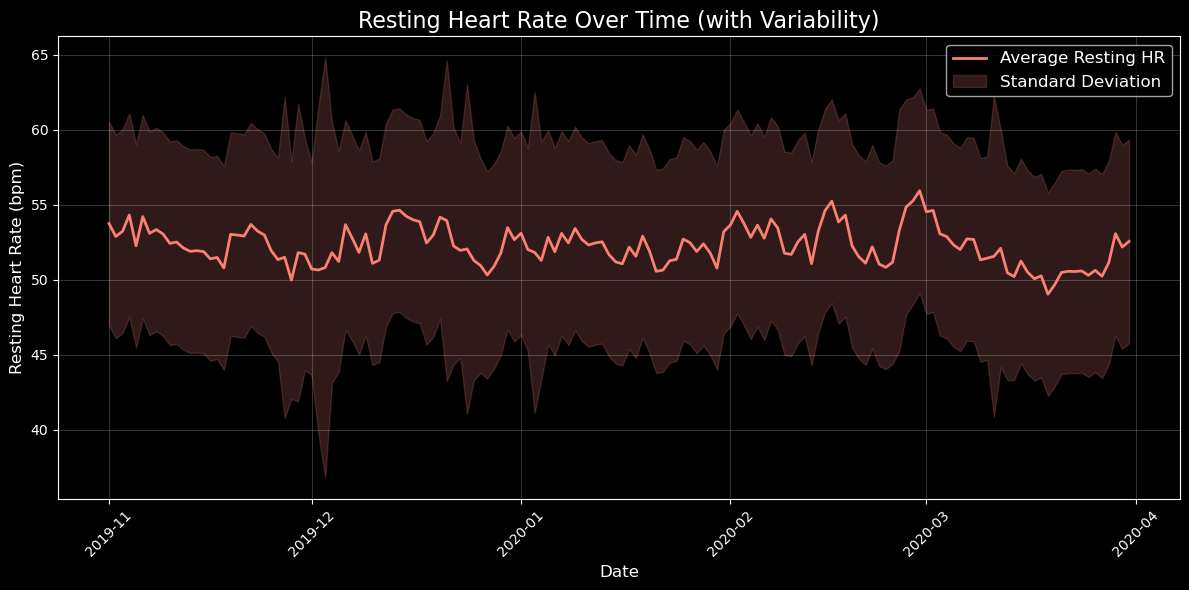

In [102]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(RHR['dateTime'], RHR['resting_hr'], 
    label='Average Resting HR', color='salmon', linewidth=2)
ax.fill_between(RHR['dateTime'],
    RHR['resting_hr'] - RHR['error_std'],
    RHR['resting_hr'] + RHR['error_std'],
    color='lightcoral', alpha=0.2, label='Standard Deviation')

ax.set_title('Resting Heart Rate Over Time (with Variability)', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Resting Heart Rate (bpm)', fontsize=12)
ax.grid(alpha=0.2)
ax.legend(loc='best', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### `sleep`

In [103]:
sleep = pd.read_json("p01/fitbit/sleep.json")

In [104]:
sleep.shape

(155, 15)

In [105]:
sleep.head(1)

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,25800000,0,378,52,0,430,97,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 36, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 26, 'minutes': 52, 'thirtyDayAvgMinutes': 42}, 'light': {'count': 30, 'minutes': 259, 'thirtyDayAvgMinutes': 249}, 'rem': {'count': 4, 'minutes': 83, 'thirtyDayAvgMinutes': 55}}, 'data': [{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T00:10:00.000', 'level': 'light', 'seconds': 3570}, {'dateTime': '2019-11-02T01:09:30.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T01:28:30.000', 'level': 'light', 'seconds': 210}, {'dateTime': '2019-11-02T01:32:00.000', 'level': 'rem', 'seconds': 930}, {'dateTime': '2019-11-02T01:47:30.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T02:30:30.000', 'level': 'rem', 'seconds': 1350}, {'dateTime': '2019-11-02T02:53:00.000', 'level': 'light', 'seconds': 720}, {'dateTime': '2019-11-02T03:05:00.000', 'level': 'rem', 'seconds': 1200}, {'dateTime': '2019-11-02T03:25:00.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T04:08:00.000', 'level': 'wake', 'seconds': 510}, {'dateTime': '2019-11-02T04:16:30.000', 'level': 'light', 'seconds': 2250}, {'dateTime': '2019-11-02T04:54:00.000', 'level': 'wake', 'seconds': 240}, {'dateTime': '2019-11-02T04:58:00.000', 'level': 'light', 'seconds': 2970}, {'dateTime': '2019-11-02T05:47:30.000', 'level': 'rem', 'seconds': 1500}, {'dateTime': '2019-11-02T06:12:30.000', 'level': 'light', 'seconds': 1350}, {'dateTime': '20...",True


In [106]:
sleep = sleep.join(
    pd.json_normalize(sleep['levels'])
).drop(['levels', 'shortData'], axis=1)

date_cols = ['dateOfSleep', 'startTime', 'endTime']

for col in date_cols:
    sleep[col] = pd.to_datetime(sleep[col])

sleep.head(1)

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,mainSleep,data,summary.deep.count,summary.deep.minutes,summary.deep.thirtyDayAvgMinutes,summary.wake.count,summary.wake.minutes,summary.wake.thirtyDayAvgMinutes,summary.light.count,summary.light.minutes,summary.light.thirtyDayAvgMinutes,summary.rem.count,summary.rem.minutes,summary.rem.thirtyDayAvgMinutes
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02 07:19:30,25800000,0,378,52,0,430,97,stages,0,True,"[{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T00:10:00.000', 'level': 'light', 'seconds': 3570}, {'dateTime': '2019-11-02T01:09:30.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T01:28:30.000', 'level': 'light', 'seconds': 210}, {'dateTime': '2019-11-02T01:32:00.000', 'level': 'rem', 'seconds': 930}, {'dateTime': '2019-11-02T01:47:30.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T02:30:30.000', 'level': 'rem', 'seconds': 1350}, {'dateTime': '2019-11-02T02:53:00.000', 'level': 'light', 'seconds': 720}, {'dateTime': '2019-11-02T03:05:00.000', 'level': 'rem', 'seconds': 1200}, {'dateTime': '2019-11-02T03:25:00.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T04:08:00.000', 'level': 'wake', 'seconds': 510}, {'dateTime': '2019-11-02T04:16:30.000', 'level': 'light', 'seconds': 2250}, {'dateTime': '2019-11-02T04:54:00.000', 'level': 'wake', 'seconds': 240}, {'dateTime': '2019-11-02T04:58:00.000', 'level': 'light', 'seconds': 2970}, {'dateTime': '2019-11-02T05:47:30.000', 'level': 'rem', 'seconds': 1500}, {'dateTime': '2019-11-02T06:12:30.000', 'level': 'light', 'seconds': 1350}, {'dateTime': '2019-11-02T06:35:00.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T06:54:00.000', 'level': 'light', 'seconds': 1080}, {'dateTime': '2019-11-02T07:12:00.000', 'level': 'wake', 'seconds': 450}]",2,36,40,26,52,42,30,259,249,4,83,55


In [107]:
sleep['mainSleep'].value_counts()

mainSleep
True    155
Name: count, dtype: int64

In [108]:
sleep.shape

(155, 27)

In [109]:
pd.json_normalize(sleep['data'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,"{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 30}","{'dateTime': '2019-11-02T00:10:00.000', 'level': 'light', 'seconds': 3570}","{'dateTime': '2019-11-02T01:09:30.000', 'level': 'deep', 'seconds': 1140}","{'dateTime': '2019-11-02T01:28:30.000', 'level': 'light', 'seconds': 210}","{'dateTime': '2019-11-02T01:32:00.000', 'level': 'rem', 'seconds': 930}","{'dateTime': '2019-11-02T01:47:30.000', 'level': 'light', 'seconds': 2580}","{'dateTime': '2019-11-02T02:30:30.000', 'level': 'rem', 'seconds': 1350}","{'dateTime': '2019-11-02T02:53:00.000', 'level': 'light', 'seconds': 720}","{'dateTime': '2019-11-02T03:05:00.000', 'level': 'rem', 'seconds': 1200}","{'dateTime': '2019-11-02T03:25:00.000', 'level': 'light', 'seconds': 2580}","{'dateTime': '2019-11-02T04:08:00.000', 'level': 'wake', 'seconds': 510}","{'dateTime': '2019-11-02T04:16:30.000', 'level': 'light', 'seconds': 2250}","{'dateTime': '2019-11-02T04:54:00.000', 'level': 'wake', 'seconds': 240}","{'dateTime': '2019-11-02T04:58:00.000', 'level': 'light', 'seconds': 2970}","{'dateTime': '2019-11-02T05:47:30.000', 'level': 'rem', 'seconds': 1500}","{'dateTime': '2019-11-02T06:12:30.000', 'level': 'light', 'seconds': 1350}","{'dateTime': '2019-11-02T06:35:00.000', 'level': 'deep', 'seconds': 1140}","{'dateTime': '2019-11-02T06:54:00.000', 'level': 'light', 'seconds': 1080}","{'dateTime': '2019-11-02T07:12:00.000', 'level': 'wake', 'seconds': 450}",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"{'dateTime': '2019-11-03T00:32:00.000', 'level': 'light', 'seconds': 450}","{'dateTime': '2019-11-03T00:39:30.000', 'level': 'wake', 'seconds': 390}","{'dateTime': '2019-11-03T00:46:00.000', 'level': 'light', 'seconds': 930}","{'dateTime': '2019-11-03T01:01:30.000', 'level': 'wake', 'seconds': 780}","{'dateTime': '2019-11-03T01:14:30.000', 'level': 'light', 'seconds': 1650}","{'dateTime': '2019-11-03T01:42:00.000', 'level': 'deep', 'seconds': 1050}","{'dateTime': '2019-11-03T01:59:30.000', 'level': 'light', 'seconds': 2430}","{'dateTime': '2019-11-03T02:40:00.000', 'level': 'rem', 'seconds': 510}","{'dateTime': '2019-11-03T02:48:30.000', 'level': 'light', 'seconds': 4530}","{'dateTime': '2019-11-03T04:04:00.000', 'level': 'rem', 'seconds': 1050}","{'dateTime': '2019-11-03T04:21:30.000', 'level': 'light', 'seconds': 3360}","{'dateTime': '2019-11-03T05:17:30.000', 'level': 'deep', 'seconds': 1290}","{'dateTime': '2019-11-03T05:39:00.000', 'level': 'light', 'seconds': 270}","{'dateTime': '2019-11-03T05:43:30.000', 'level': 'rem', 'seconds': 360}","{'dateTime': '2019-11-03T05:49:30.000', 'level': 'light', 'seconds': 3120}","{'dateTime': '2019-11-03T06:41:30.000', 'level': 'rem', 'seconds': 1170}","{'dateTime': '2019-11-03T07:01:00.000', 'level': 'wake', 'seconds': 300}","{'dateTime': '2019-11-03T07:06:00.000', 'level': 'light', 'seconds': 1710}",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"{'dateTime': '2019-11-03T23:55:30.000', 'level': 'light', 'seconds': 690}","{'dateTime': '2019-11-04T00:07:00.000', 'level': 'deep', 'seconds': 1950}","{'dateTime': '2019-11-04T00:39:30.000', 'level': 'light', 'seconds': 120}","{'dateTime': '2019-11-04T00:41:30.000', 'level': 'wake', 'seconds': 210}","{'dateTime': '2019-11-04T00:45:00.000', 'level': 'light', 'seconds': 5010}","{'dateTime': '2019-11-04T02:08:30.000', 'level': 'rem', 'seconds': 1290}","{'dateTime': '2019-11-04T02:30:00.000', 'level': 'light', 'seconds': 2520}","{'dateTime': '2019-11-04T03:12:00.000', 'level': 'deep', 'seconds': 360}","{'dateTime': '2019-11-04T03:18:00.000', 'level': 'light', 'seconds': 6240}","{'dateTime': '2019-11-04T05:02:00.000', 'level': 'rem', 'seconds': 270}","{'dateTime': '2019-11-04T05:06:30.000', 'level': 'light', 'seconds': 1710}","{'dateTime': '2019-11-04T05:35:00.000', 'level': 'rem', 'seconds': 300}","{'dateTime': '2019-11-04T05:40

In [110]:
## How to:
# (1) Make each `data` to_dict of list,
# (2) and by chance get that format into Tableau

In [111]:
sleep_chr = pd.DataFrame(sleep['data'].explode('data'))

sleep_chr = (sleep_chr
    .merge(pd.json_normalize(sleep_chr['data']), 
           left_index=True, right_index=True)
    .drop('data', axis=1))

sleep_chr['dateTime'] = pd.to_datetime(sleep_chr['dateTime'])
sleep_chr

## We've done the parsing, at least for one row.
## Now what to do from here? How can we make it
## readable in Tableau while preserving the
## DataFrame as a whole row?

,dateTime,level,seconds
0,2019-11-02 00:09:30,wake,30
1,2019-11-02 00:10:00,light,3570
2,2019-11-02 01:09:30,deep,1140
3,2019-11-02 01:28:30,light,210
4,2019-11-02 01:32:00,rem,930
...,...,...,...
2941,2020-03-31 05:56:00,light,2100
2942,2020-03-31 06:31:00,rem,270
2943,2020-03-31 06:35:30,light,450
2944,2020-03-31 06:43:00,rem,420


In [112]:
sleep[['logId', 'startTime']]

,logId,startTime
0,24486013387,2019-11-02 00:09:30
1,24497341340,2019-11-03 00:32:00
2,24507914069,2019-11-03 23:55:30
3,24521896102,2019-11-05 00:22:30
4,24534036899,2019-11-06 00:25:30
...,...,...
150,26491780871,2020-03-27 02:27:00
151,26502379603,2020-03-28 01:03:30
152,26516647751,2020-03-29 00:46:30
153,26528257996,2020-03-30 00:17:00


In [113]:
sleep_chr = sleep_chr.merge(sleep[['logId', 'startTime']], how='left',
         left_on='dateTime', right_on='startTime').drop('startTime', axis=1).ffill()
sleep_chr

,dateTime,level,seconds,logId
0,2019-11-02 00:09:30,wake,30,2.448601e+10
1,2019-11-02 00:10:00,light,3570,2.448601e+10
2,2019-11-02 01:09:30,deep,1140,2.448601e+10
3,2019-11-02 01:28:30,light,210,2.448601e+10
4,2019-11-02 01:32:00,rem,930,2.448601e+10
...,...,...,...,...
2951,2020-03-31 05:56:00,light,2100,2.654008e+10
2952,2020-03-31 06:31:00,rem,270,2.654008e+10
2953,2020-03-31 06:35:30,light,450,2.654008e+10
2954,2020-03-31 06:43:00,rem,420,2.654008e+10


In [114]:
sleep_grouped = sleep_chr.groupby(['logId', 'level']).agg(
    date = ('dateTime', lambda x: x.max() - pd.Timedelta(days=1)),
    duration = ('seconds', 'sum')
).reset_index()

sleep_grouped['logId'] = sleep_grouped['logId'].astype('int64')
sleep_grouped

,logId,level,date,duration
0,24486013387,deep,2019-11-01 06:35:00,2280
1,24486013387,light,2019-11-01 06:54:00,17310
2,24486013387,rem,2019-11-01 05:47:30,4980
3,24486013387,wake,2019-11-01 07:12:00,1230
4,24497341340,deep,2019-11-02 05:17:30,2340
...,...,...,...,...
594,26528257996,wake,2020-03-29 07:11:30,1500
595,26540075740,deep,2020-03-30 04:47:30,2730
596,26540075740,light,2020-03-30 06:50:00,14940
597,26540075740,rem,2020-03-30 06:43:00,4320


In [115]:
sleep_stages = sleep_chr.groupby(['logId', 'level']).agg(
    date = ('dateTime', lambda x: x.max() - pd.Timedelta(days=1)),
    duration = ('seconds', 'sum')
).reset_index()

sleep_stages['logId'] = sleep_stages['logId'].astype('int64')
sleep_stages['date']  = sleep_stages['date'].dt.date
sleep_stages = sleep_stages.sort_values(['logId', 'date'])
sleep_stages

,logId,level,date,duration
0,24486013387,deep,2019-11-01,2280
1,24486013387,light,2019-11-01,17310
2,24486013387,rem,2019-11-01,4980
3,24486013387,wake,2019-11-01,1230
4,24497341340,deep,2019-11-02,2340
...,...,...,...,...
594,26528257996,wake,2020-03-29,1500
595,26540075740,deep,2020-03-30,2730
596,26540075740,light,2020-03-30,14940
597,26540075740,rem,2020-03-30,4320


In [116]:
sleep_stages.value_counts('level')

level
light      150
rem        150
wake       150
deep       148
unknown      1
Name: count, dtype: int64

In [117]:
sleep_stages.value_counts('date')

date
2020-01-14    5
2020-03-28    5
2020-02-11    4
2020-02-04    4
2020-02-05    4
             ..
2019-12-12    4
2019-12-11    4
2020-02-20    3
2020-01-10    3
2020-01-15    3
Name: count, Length: 150, dtype: int64

In [118]:
sleep_stages[-15:]

,logId,level,date,duration
584,26502379603,rem,2020-03-27,3570
585,26502379603,wake,2020-03-27,2190
586,26516647751,deep,2020-03-28,3450
587,26516647751,light,2020-03-28,16020
588,26516647751,rem,2020-03-28,2370
589,26516647751,unknown,2020-03-28,3600
590,26516647751,wake,2020-03-28,3000
591,26528257996,deep,2020-03-29,2100
592,26528257996,light,2020-03-29,17490
593,26528257996,rem,2020-03-29,4290


In [119]:
# There's only one unknown. We'll change it to `wake` for efficiency.
## Add the duration into 'wake' stages, and delete the 'unknown'

sleep_stages.loc[sleep_stages.index == 590, 'duration'] += 3600
sleep_stages = sleep_stages.drop(index=589)

In [120]:
sleep_stages.value_counts('level')

level
light    150
rem      150
wake     150
deep     148
Name: count, dtype: int64

In [121]:
# Check records with no 'deep' stages
sleep_stages[275:285]

,logId,level,date,duration
275,25356549170,wake,2020-01-08,1890
276,25371920891,deep,2020-01-09,2670
277,25371920891,light,2020-01-09,15090
278,25371920891,rem,2020-01-09,3840
279,25371920891,wake,2020-01-09,1470
280,25385814738,light,2020-01-10,23070
281,25385814738,rem,2020-01-10,6870
282,25385814738,wake,2020-01-10,2220
283,25399900721,deep,2020-01-11,1140
284,25399900721,light,2020-01-11,22440


In [122]:
# Check records with no 'deep' stages
sleep_stages[440:450]

,logId,level,date,duration
440,25980514519,light,2020-02-19,14340
441,25980514519,rem,2020-02-19,4140
442,25980514519,wake,2020-02-19,30
443,26002023337,light,2020-02-20,15300
444,26002023337,rem,2020-02-20,1530
445,26002023337,wake,2020-02-20,1560
446,26015459375,deep,2020-02-21,2130
447,26015459375,light,2020-02-21,17940
448,26015459375,rem,2020-02-21,4200
449,26015459375,wake,2020-02-21,810


In [123]:
sleep_stages[295:305]

,logId,level,date,duration
295,25446511879,deep,2020-01-14,2040
296,25446511879,light,2020-01-14,19380
297,25446511879,rem,2020-01-14,2400
298,25446511879,wake,2020-01-14,2100
302,25459709394,wake,2020-01-14,1260
299,25459709394,deep,2020-01-15,2190
300,25459709394,light,2020-01-15,16920
301,25459709394,rem,2020-01-15,3210
303,25476657499,deep,2020-01-16,4530
304,25476657499,light,2020-01-16,11640


In [124]:
## Deduction: 
# 2 days lack deep sleep, check.
# 1 day has unknown stage, cleaned.
# 1 day has 5, 1 day has 3, 
# with date close to one another.
## One stage may end up max on previous date.

## Check the latest time
sleep_grouped[295:305]

,logId,level,date,duration
295,25446511879,deep,2020-01-14 01:22:30,2040
296,25446511879,light,2020-01-14 04:15:00,19380
297,25446511879,rem,2020-01-14 04:09:30,2400
298,25446511879,wake,2020-01-14 05:52:00,2100
299,25459709394,deep,2020-01-15 05:15:00,2190
300,25459709394,light,2020-01-15 05:29:30,16920
301,25459709394,rem,2020-01-15 05:43:00,3210
302,25459709394,wake,2020-01-14 23:36:00,1260
303,25476657499,deep,2020-01-16 01:39:00,4530
304,25476657499,light,2020-01-16 05:48:00,11640


In [125]:
# Latest 'wake' time on logId = 25459709394 was on previous day.
# One logId should've had the same date. With that, we're
# changing all dates on the 'logId' to the majority, '2020-01-15'
sleep_stages.loc[sleep_stages['logId'] == 25459709394, 'date'] = '2020-01-15'

In [126]:
sleep_stages[295:305]

,logId,level,date,duration
295,25446511879,deep,2020-01-14,2040
296,25446511879,light,2020-01-14,19380
297,25446511879,rem,2020-01-14,2400
298,25446511879,wake,2020-01-14,2100
302,25459709394,wake,2020-01-15,1260
299,25459709394,deep,2020-01-15,2190
300,25459709394,light,2020-01-15,16920
301,25459709394,rem,2020-01-15,3210
303,25476657499,deep,2020-01-16,4530
304,25476657499,light,2020-01-16,11640


In [127]:
sleep_stages.value_counts('date')

date
2019-11-01    4
2020-02-04    4
2020-02-06    4
2020-02-07    4
2020-02-08    4
             ..
2019-12-22    4
2019-12-23    4
2020-01-15    4
2020-01-10    3
2020-02-20    3
Name: count, Length: 150, dtype: int64

#### Attempts on Visuals

In [128]:
sleep_stages.dtypes

logId        int64
level       object
date        object
duration     int64
dtype: object

In [129]:
sleep_stages['date'] = pd.to_datetime(sleep_stages['date'])
sleep_stages

,logId,level,date,duration
0,24486013387,deep,2019-11-01,2280
1,24486013387,light,2019-11-01,17310
2,24486013387,rem,2019-11-01,4980
3,24486013387,wake,2019-11-01,1230
4,24497341340,deep,2019-11-02,2340
...,...,...,...,...
594,26528257996,wake,2020-03-29,1500
595,26540075740,deep,2020-03-30,2730
596,26540075740,light,2020-03-30,14940
597,26540075740,rem,2020-03-30,4320


In [130]:
sleep_stages_pivot = sleep_stages.drop('logId', axis=1).pivot(
    columns='level', index='date', values='duration')
sleep_stages_pivot

level,deep,light,rem,wake
date,,,,
2019-11-01,2280.0,17310.0,4980.0,1230.0
2019-11-02,2340.0,18450.0,3090.0,1470.0
2019-11-03,2310.0,18480.0,2130.0,1050.0
2019-11-04,1590.0,16740.0,2490.0,930.0
2019-11-05,3990.0,15390.0,2310.0,150.0
...,...,...,...,...
2020-03-26,3630.0,12570.0,3150.0,1380.0
2020-03-27,330.0,18060.0,3570.0,2190.0
2020-03-28,3450.0,16020.0,2370.0,6600.0


In [131]:
# Check the 2 records lack of deep sleep
sleep_stages_pivot.isna().sum()

level
deep     2
light    0
rem      0
wake     0
dtype: int64

In [132]:
sleep_stages_pivot = sleep_stages_pivot.fillna(0)
sleep_stages_pivot.isna().sum()

level
deep     0
light    0
rem      0
wake     0
dtype: int64

<Axes: xlabel='date'>

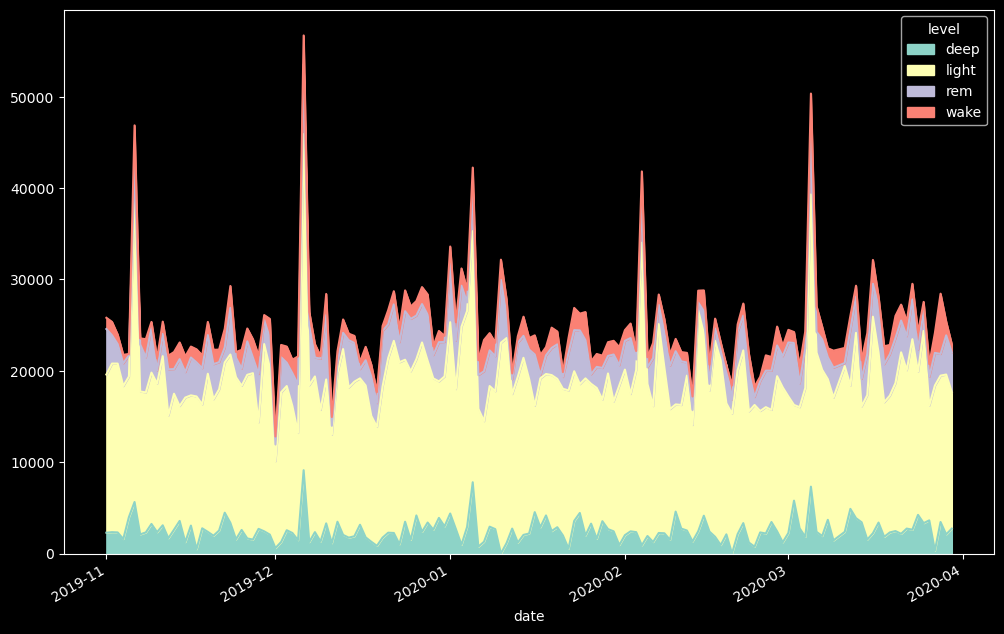

In [133]:
# Experiment 1: Stacked area chart, a regular one
fig, ax = plt.subplots(figsize=(12, 8))

sleep_stages_pivot.plot.area(stacked=True, ax=ax)

In [134]:
sleep.shape

(155, 27)

In [135]:
sleep.loc[sleep['mainSleep'] != True, :]

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,mainSleep,data,summary.deep.count,summary.deep.minutes,summary.deep.thirtyDayAvgMinutes,summary.wake.count,summary.wake.minutes,summary.wake.thirtyDayAvgMinutes,summary.light.count,summary.light.minutes,summary.light.thirtyDayAvgMinutes,summary.rem.count,summary.rem.minutes,summary.rem.thirtyDayAvgMinutes


In [136]:
# Colors inspired by deep ocean blue--the deeper the darker, much like our sleep.
# Color sequence: deep-rem-light-wake
deep_stages_colors = ['#0F3E58', '#015482', '#4AA6D7', '#82D3FF']

In [137]:
## Findings: If you may notice, there are 155 records of 
##    original data 'sleep', but you see the data is recorded for 150 days. 
## There are times the person decided to add another sleep, hence the spikes.

# Experiment 1.2: What if we limit it only to recent X days only?
#    We could change the color too--the darker the deeper

## Streamline the process from the sleep_chr DF, put it all into one function.

def total_sleep_stages_chart(days):
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Now we have 4 records in pivoted data, 
    # we no longer need to match the dates   
    sleep_stages_pivot[-days:].plot.area(ax=ax,
        color=deep_stages_colors)
    
    ax.set_title(f'Sleep Stages of p01 in latest {days} days')
    ax.set_xlabel('Date')
    ax.set_ylabel('Duration')
    ax.grid(alpha=0.4)
    ax.legend(title='Sleep Stages', fontsize=12, loc='best')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

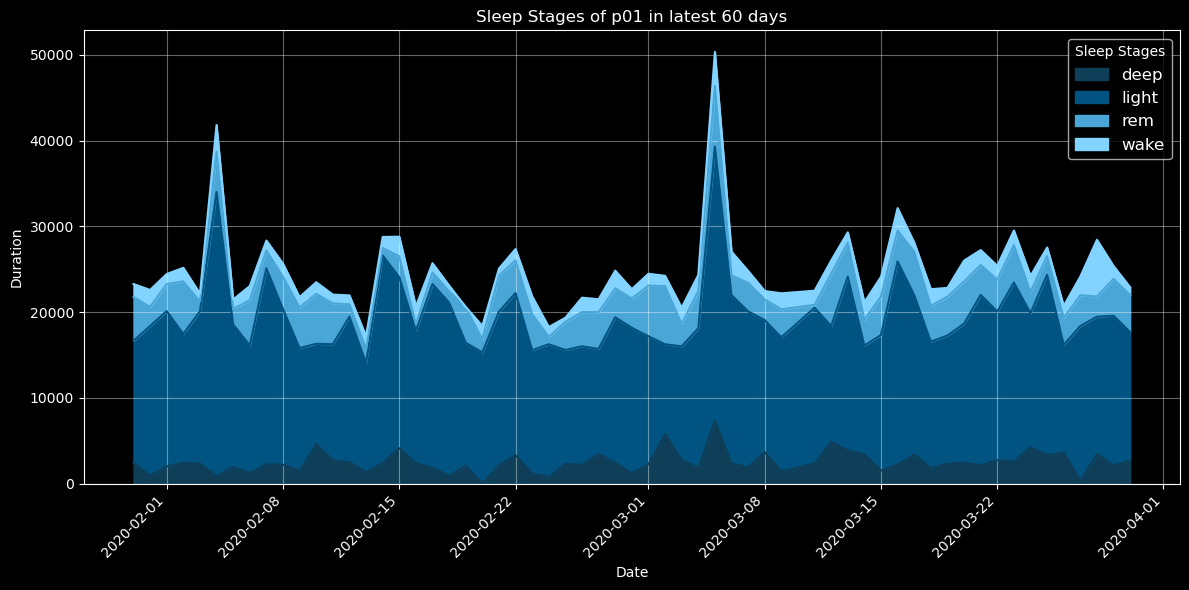

In [138]:
total_sleep_stages_chart(60)

In [139]:
## Experiment 2: Visualizing changes in deep stages at sleep
sleep_chr

,dateTime,level,seconds,logId
0,2019-11-02 00:09:30,wake,30,2.448601e+10
1,2019-11-02 00:10:00,light,3570,2.448601e+10
2,2019-11-02 01:09:30,deep,1140,2.448601e+10
3,2019-11-02 01:28:30,light,210,2.448601e+10
4,2019-11-02 01:32:00,rem,930,2.448601e+10
...,...,...,...,...
2951,2020-03-31 05:56:00,light,2100,2.654008e+10
2952,2020-03-31 06:31:00,rem,270,2.654008e+10
2953,2020-03-31 06:35:30,light,450,2.654008e+10
2954,2020-03-31 06:43:00,rem,420,2.654008e+10


In [140]:
sleep_chr.loc[sleep_chr['level'] == 'unknown', :]

,dateTime,level,seconds,logId
2913,2020-03-29 07:40:30,unknown,3600,2.651665e+10


In [141]:
sleep_chr['logId'] = sleep_chr['logId'].astype('int64')
sleep_chr.loc[sleep_chr['level'] == 'unknown', 'level'] = 'wake'
sleep_chr

,dateTime,level,seconds,logId
0,2019-11-02 00:09:30,wake,30,24486013387
1,2019-11-02 00:10:00,light,3570,24486013387
2,2019-11-02 01:09:30,deep,1140,24486013387
3,2019-11-02 01:28:30,light,210,24486013387
4,2019-11-02 01:32:00,rem,930,24486013387
...,...,...,...,...
2951,2020-03-31 05:56:00,light,2100,26540075740
2952,2020-03-31 06:31:00,rem,270,26540075740
2953,2020-03-31 06:35:30,light,450,26540075740
2954,2020-03-31 06:43:00,rem,420,26540075740


In [142]:
stage_order = ['deep', 'rem', 'light', 'wake']

sleep_chr['level'] = pd.Categorical(sleep_chr['level'],
    categories=stage_order, ordered=True)
sleep_chr['level_num'] = sleep_chr['level'].cat.codes
sleep_chr

,dateTime,level,seconds,logId,level_num
0,2019-11-02 00:09:30,wake,30,24486013387,3
1,2019-11-02 00:10:00,light,3570,24486013387,2
2,2019-11-02 01:09:30,deep,1140,24486013387,0
3,2019-11-02 01:28:30,light,210,24486013387,2
4,2019-11-02 01:32:00,rem,930,24486013387,1
...,...,...,...,...,...
2951,2020-03-31 05:56:00,light,2100,26540075740,2
2952,2020-03-31 06:31:00,rem,270,26540075740,1
2953,2020-03-31 06:35:30,light,450,26540075740,2
2954,2020-03-31 06:43:00,rem,420,26540075740,1


In [143]:
sleep_chr.dtypes

dateTime     datetime64[ns]
level              category
seconds               int64
logId                 int64
level_num              int8
dtype: object

In [144]:
# Taking sample of first data: 2019-11-01, taken in 
# the midnight where the date has changed.
sleep_chr_test = sleep_chr.loc[sleep_chr['logId'] == 24486013387, :]
sleep_chr_test

,dateTime,level,seconds,logId,level_num
0,2019-11-02 00:09:30,wake,30,24486013387,3
1,2019-11-02 00:10:00,light,3570,24486013387,2
2,2019-11-02 01:09:30,deep,1140,24486013387,0
3,2019-11-02 01:28:30,light,210,24486013387,2
4,2019-11-02 01:32:00,rem,930,24486013387,1
5,2019-11-02 01:47:30,light,2580,24486013387,2
6,2019-11-02 02:30:30,rem,1350,24486013387,1
7,2019-11-02 02:53:00,light,720,24486013387,2
8,2019-11-02 03:05:00,rem,1200,24486013387,1
9,2019-11-02 03:25:00,light,2580,24486013387,2


In [145]:
## You want tomake the date added by 1. Options: Timedelta, but not effective
## And then compare it by doing boolean indexing. But it's a bit convoluted.

test_date = '2019-11-01'
date_formatted = pd.to_datetime(test_date) + pd.Timedelta(days=1)

sleep_chr.loc[sleep_chr['dateTime'].dt.date == date_formatted, :]

,dateTime,level,seconds,logId,level_num


In [146]:
stage_order = ['deep', 'rem', 'light', 'wake']

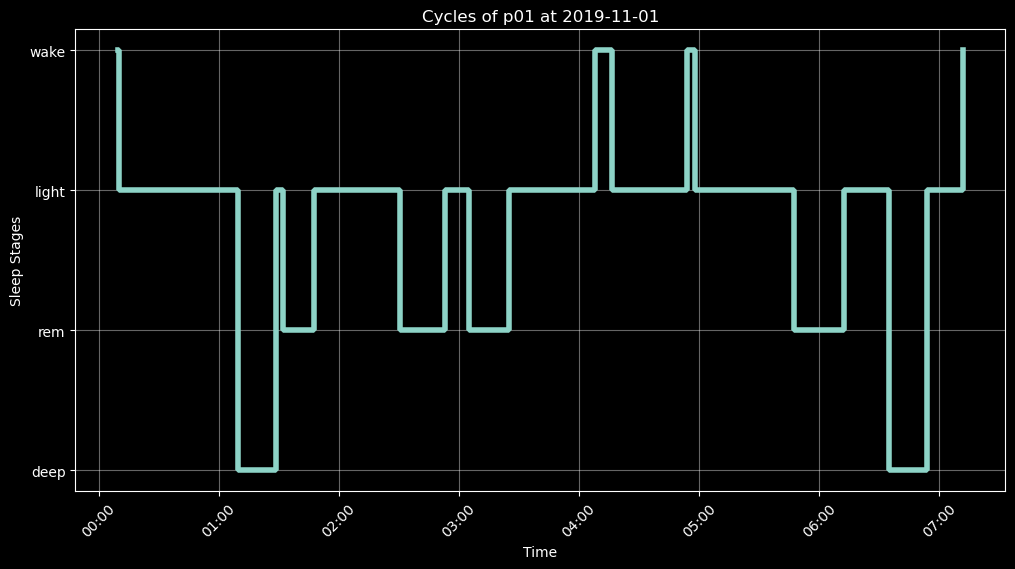

In [147]:
## How to sort the y-order to match `stage_order`?

stage_labels = sleep_chr['level'].cat.categories
stage_values = range(len(stage_labels))

fig, ax = plt.subplots(figsize=(12, 6))

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

ax.step(
    sleep_chr_test['dateTime'], 
    sleep_chr_test['level'].cat.codes, where='post', 
    linewidth=4, solid_joinstyle='bevel')
ax.set_title('Cycles of p01 at 2019-11-01')
ax.set_xlabel('Time')
ax.set_ylabel('Sleep Stages')

ax.set_yticks(stage_values)
ax.set_yticklabels(stage_labels)

ax.grid(alpha=0.4)

In [148]:
def sleep_stages_by_day_chart(date):
    
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)

    ax.step(
        sleep_chr_test['dateTime'], 
        sleep_chr_test['level'], where='post', 
        linewidth=4, solid_joinstyle='bevel')
    ax.set_title('Cycles of p01 at 2019-11-01')
    ax.set_xlabel('Time')
    ax.set_ylabel('Sleep Stages')

    ax.grid(alpha=0.4)

### `sleep_score`

In [149]:
sleep_score = pd.read_csv("p01/fitbit/sleep_score.csv")

In [150]:
sleep_score

,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-11-01T06:29:30Z,24472394143,76,18,20,38,27,53,0.053635
1,2019-11-02T07:19:30Z,24486013387,79,20,22,37,36,53,0.078978
2,2019-11-03T07:34:30Z,24497341340,71,16,17,38,38,52,0.093491
3,2019-11-04T06:35:00Z,24507914069,68,15,15,38,37,53,0.064851
4,2019-11-05T06:25:00Z,24521896102,73,15,22,36,26,54,0.093185
...,...,...,...,...,...,...,...,...,...
145,2020-03-26T07:52:00Z,26479066869,76,16,20,40,54,50,0.058306
146,2020-03-27T08:12:30Z,26491780871,72,19,20,33,59,50,0.096961
147,2020-03-28T07:46:00Z,26502379603,67,16,14,37,5,50,0.087126
148,2020-03-29T08:40:30Z,26516647751,62,16,14,32,55,51,0.056962


In [151]:
sleep_score.describe()

,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
count,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.546667e+10,71.633333,17.266667,17.706667,36.660000,38.780000,51.800000,0.086812
std,6.112299e+08,5.634763,2.350687,2.997867,3.268376,17.297581,1.336127,0.029666
min,2.447239e+10,53.000000,12.000000,10.000000,25.000000,0.000000,49.000000,0.039437
25%,2.493150e+10,68.000000,15.000000,15.000000,35.000000,27.250000,51.000000,0.065046
50%,2.543836e+10,72.000000,17.000000,18.000000,37.000000,37.500000,52.000000,0.081021
75%,2.599665e+10,75.000000,19.000000,20.000000,38.750000,48.750000,53.000000,0.101530
max,2.652826e+10,88.000000,22.000000,23.000000,46.000000,93.000000,55.000000,0.199021


In [152]:
## After more exploring, the typical ranges include:
## Excellent: 90-100, Good: 80-89, Fair: 60-79, Poor: <60
## Most users on average score between 72 and 83.

conditions = [(sleep_score['overall_score'] >= 90), 
    (sleep_score['overall_score']  < 90) & (sleep_score['overall_score'] >= 80),
    (sleep_score['overall_score']  < 80) & (sleep_score['overall_score'] >= 60),
    (sleep_score['overall_score']  < 60)]

choices = ['Excellent', 'Good', 'Fair', 'Poor']

In [153]:
%timeit np.select(conditions, choices, default=0)

84.8 μs ± 10.1 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [154]:
sleep_score['sleep_quality'] = np.select(conditions, choices, default=0)

In [155]:
sleep_score

,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,sleep_quality
0,2019-11-01T06:29:30Z,24472394143,76,18,20,38,27,53,0.053635,Fair
1,2019-11-02T07:19:30Z,24486013387,79,20,22,37,36,53,0.078978,Fair
2,2019-11-03T07:34:30Z,24497341340,71,16,17,38,38,52,0.093491,Fair
3,2019-11-04T06:35:00Z,24507914069,68,15,15,38,37,53,0.064851,Fair
4,2019-11-05T06:25:00Z,24521896102,73,15,22,36,26,54,0.093185,Fair
...,...,...,...,...,...,...,...,...,...,...
145,2020-03-26T07:52:00Z,26479066869,76,16,20,40,54,50,0.058306,Fair
146,2020-03-27T08:12:30Z,26491780871,72,19,20,33,59,50,0.096961,Fair
147,2020-03-28T07:46:00Z,26502379603,67,16,14,37,5,50,0.087126,Fair
148,2020-03-29T08:40:30Z,26516647751,62,16,14,32,55,51,0.056962,Fair


In [156]:
sleep_quality_grouped = pd.DataFrame(sleep_score.value_counts('sleep_quality')).reset_index()
sleep_quality_grouped

,sleep_quality,count
0,Fair,134
1,Good,11
2,Poor,5


Text(0.5, 1.0, 'Sleep Quality of p01')

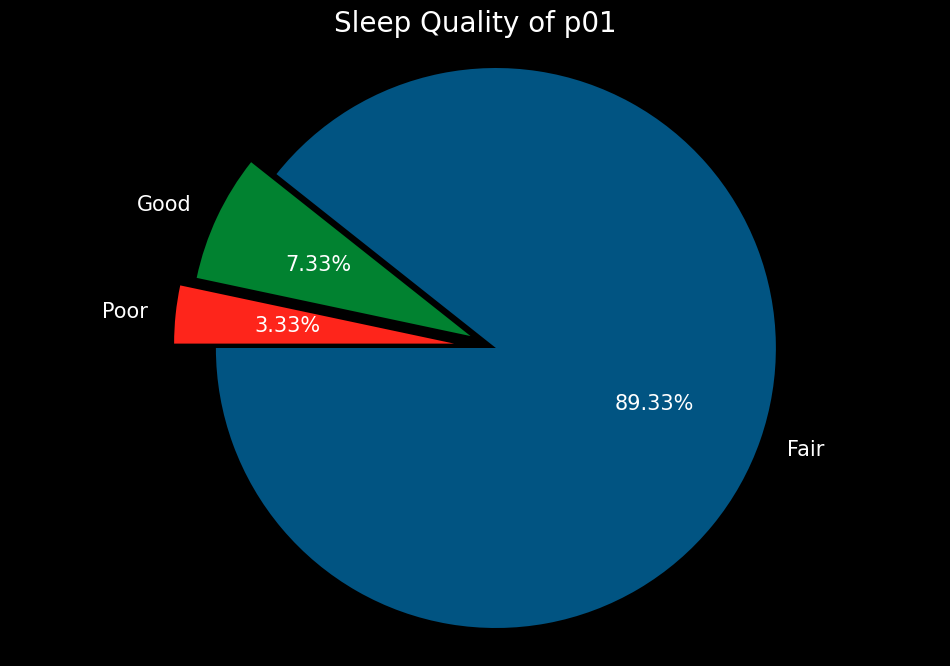

In [157]:
## Sequence from dataframe: Fair-Good-Poor; 2-3-1

explode = (0, 0.1, 0.15)
sq_colors = ['#015482', '#018230', '#FE251B']

fig, ax = plt.subplots(figsize=(12, 8))

ax.pie(sleep_quality_grouped['count'], explode=explode,
    labels=sleep_quality_grouped['sleep_quality'], 
    textprops={'fontsize': 15}, autopct='%1.2f%%', 
    startangle=180, colors=sq_colors)
ax.axis('equal')
ax.set_title('Sleep Quality of p01', fontsize=20)

## `googledocs`

### `reporting`

In [158]:
reporting = pd.read_csv("p01/googledocs/reporting.csv")

In [159]:
## One thing to notice, there are duplicate

reporting

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
0,06/11/2019,06/12/2019 21:58:30,"Breakfast, Dinner",100.0,7,No
1,09/11/2019,09/12/2019 21:17:02,"Breakfast, Evening",100.0,6,No
2,10/11/2019,10/12/2019 21:52:58,"Breakfast, Lunch, Dinner",100.0,9,No
3,11/11/2019,11/11/2019 22:36:30,"Breakfast, Dinner",100.0,5,No
4,12/11/2019,13/11/2019 00:15:47,"Breakfast, Lunch, Dinner",100.0,7,No
...,...,...,...,...,...,...
104,27/03/2020,28/03/2020 00:52:18,"Breakfast, Dinner",NaN,8,No
105,28/03/2020,29/03/2020 00:33:43,"Breakfast, Dinner",NaN,8,No
106,29/03/2020,01/03/2020 23:13:54,"Breakfast, Lunch, Dinner",NaN,8,No
107,29/03/2020,30/03/2020 09:23:46,"Breakfast, Dinner, Evening",NaN,7,No


In [160]:
# reporting[['meals_1', 'meals_2', 'meals_3', 'meals_4']] = (
#     reporting['meals'].str.split(', ', expand=True))
# reporting

In [161]:
reporting['date']      = pd.to_datetime(reporting['date'], dayfirst=True)
reporting['timestamp'] = pd.to_datetime(reporting['timestamp'], dayfirst=True)
reporting

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
0,2019-11-06,2019-12-06 21:58:30,"Breakfast, Dinner",100.0,7,No
1,2019-11-09,2019-12-09 21:17:02,"Breakfast, Evening",100.0,6,No
2,2019-11-10,2019-12-10 21:52:58,"Breakfast, Lunch, Dinner",100.0,9,No
3,2019-11-11,2019-11-11 22:36:30,"Breakfast, Dinner",100.0,5,No
4,2019-11-12,2019-11-13 00:15:47,"Breakfast, Lunch, Dinner",100.0,7,No
...,...,...,...,...,...,...
104,2020-03-27,2020-03-28 00:52:18,"Breakfast, Dinner",NaN,8,No
105,2020-03-28,2020-03-29 00:33:43,"Breakfast, Dinner",NaN,8,No
106,2020-03-29,2020-03-01 23:13:54,"Breakfast, Lunch, Dinner",NaN,8,No
107,2020-03-29,2020-03-30 09:23:46,"Breakfast, Dinner, Evening",NaN,7,No


In [162]:
reporting.sort_values('timestamp')[30:60]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
11,2019-11-17,2019-12-17 21:21:57,"Breakfast, Lunch, Dinner",101.0,10,No
13,2019-11-18,2019-12-19 00:53:22,"Breakfast, Lunch, Dinner",101.0,11,No
16,2019-11-21,2019-12-22 08:09:49,"Breakfast, Dinner",100.0,11,No
18,2019-11-22,2019-12-23 09:30:56,"Breakfast, Dinner",100.0,13,No
34,2019-12-25,2019-12-25 21:16:05,"Breakfast, Dinner",101.0,9,No
35,2019-12-27,2019-12-27 21:41:03,"Breakfast, Dinner",101.0,10,No
36,2019-12-28,2019-12-28 23:26:17,"Breakfast, Dinner",101.0,9,No
37,2019-12-29,2019-12-29 21:01:11,"Breakfast, Dinner",101.0,10,No
38,2020-01-01,2020-01-02 09:11:37,"Breakfast, Dinner",101.0,6,No
39,2020-01-05,2020-01-06 06:25:13,"Breakfast, Dinner",100.0,9,No


In [163]:
reporting.loc[reporting['date'].duplicated(keep=False), :]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
7,2019-11-15,2019-12-15 23:20:39,"Breakfast, Lunch, Dinner",100.0,9,No
8,2019-11-15,2019-11-15 23:38:30,"Breakfast, Lunch, Dinner",100.0,8,No
9,2019-11-16,2019-11-16 21:16:28,"Breakfast, Dinner",100.0,9,No
10,2019-11-16,2019-12-16 22:10:40,"Breakfast, Lunch, Dinner",100.0,8,No
11,2019-11-17,2019-12-17 21:21:57,"Breakfast, Lunch, Dinner",101.0,10,No
12,2019-11-17,2019-11-17 21:44:44,"Breakfast, Dinner, Evening",100.0,7,No
13,2019-11-18,2019-12-19 00:53:22,"Breakfast, Lunch, Dinner",101.0,11,No
14,2019-11-18,2019-11-18 21:16:20,"Breakfast, Lunch, Dinner",100.0,11,No
16,2019-11-21,2019-12-22 08:09:49,"Breakfast, Dinner",100.0,11,No
17,2019-11-21,2019-11-22 00:14:07,"Breakfast, Lunch, Dinner",101.0,9,No


In [164]:
(reporting.loc[reporting['date'].duplicated(keep=False)]
    .groupby('date').agg(index = ('timestamp', lambda x: x.index.to_list())))

,index
date,
2019-11-15,"[7, 8]"
2019-11-16,"[9, 10]"
2019-11-17,"[11, 12]"
2019-11-18,"[13, 14]"
2019-11-21,"[16, 17]"
2019-11-22,"[18, 19]"
2020-02-24,"[75, 76]"
2020-03-11,"[90, 91]"
2020-03-29,"[106, 107]"


In [165]:
time_diffs = reporting['timestamp'] - reporting['date']
time_diffs[:10]

0   30 days 21:58:30
1   30 days 21:17:02
2   30 days 21:52:58
3    0 days 22:36:30
4    1 days 00:15:47
5    0 days 22:08:03
6    1 days 00:00:47
7   30 days 23:20:39
8    0 days 23:38:30
9    0 days 21:16:28
dtype: timedelta64[ns]

In [166]:
time_diffs.sort_values()[:10]

106   -28 days +23:13:54
90       0 days 00:01:33
75       0 days 00:07:22
50       0 days 18:53:24
53       0 days 20:59:08
37       0 days 21:01:11
27       0 days 21:16:01
34       0 days 21:16:05
14       0 days 21:16:20
9        0 days 21:16:28
dtype: timedelta64[ns]

In [167]:
time_diffs.sort_values()[-15:]

96     1 days 08:13:29
38     1 days 09:11:37
107    1 days 09:23:46
52     1 days 11:03:14
49     1 days 12:39:17
45     2 days 00:21:57
1     30 days 21:17:02
11    30 days 21:21:57
2     30 days 21:52:58
0     30 days 21:58:30
10    30 days 22:10:40
7     30 days 23:20:39
13    31 days 00:53:22
16    31 days 08:09:49
18    31 days 09:30:56
dtype: timedelta64[ns]

In [168]:
# Case 1 -- Filtering total seconds less than 14400s, or within 4 hours.
reporting.loc[(time_diffs.dt.days == 0) & 
    (time_diffs.dt.total_seconds() < 14400)]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
75,2020-02-24,2020-02-24 00:07:22,"Breakfast, Lunch, Dinner",102.0,8,No
90,2020-03-11,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No


In [169]:
case_1_index =  reporting.loc[(time_diffs.dt.days == 0) & 
    (time_diffs.dt.total_seconds() < 14400)].index
case_1_index

Index([75, 90], dtype='int64')

In [170]:
## Case 2 -- Input date within a month before/after
reporting.loc[(time_diffs.dt.days >= 3) | (time_diffs.dt.days < 0)]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
0,2019-11-06,2019-12-06 21:58:30,"Breakfast, Dinner",100.0,7,No
1,2019-11-09,2019-12-09 21:17:02,"Breakfast, Evening",100.0,6,No
2,2019-11-10,2019-12-10 21:52:58,"Breakfast, Lunch, Dinner",100.0,9,No
7,2019-11-15,2019-12-15 23:20:39,"Breakfast, Lunch, Dinner",100.0,9,No
10,2019-11-16,2019-12-16 22:10:40,"Breakfast, Lunch, Dinner",100.0,8,No
11,2019-11-17,2019-12-17 21:21:57,"Breakfast, Lunch, Dinner",101.0,10,No
13,2019-11-18,2019-12-19 00:53:22,"Breakfast, Lunch, Dinner",101.0,11,No
16,2019-11-21,2019-12-22 08:09:49,"Breakfast, Dinner",100.0,11,No
18,2019-11-22,2019-12-23 09:30:56,"Breakfast, Dinner",100.0,13,No
106,2020-03-29,2020-03-01 23:13:54,"Breakfast, Lunch, Dinner",NaN,8,No


In [171]:
case_2_index = reporting.loc[(time_diffs.dt.days >= 3) | 
    (time_diffs.dt.days < 0)].index
case_2_index

Index([0, 1, 2, 7, 10, 11, 13, 16, 18, 106], dtype='int64')

Here we'll put assumption that players would fill the data ideally within 1-3 days. After further inspection, there are two occurences of `date` duplicates:

* The player at times input data at midnight, where the date changes. Yet the player inputs the `date` the same as `timestamp`--it should've been different. For this, we're changing the `date` into the previous day.
* There are few dates inputted with `timestamp` difference a month before and a month after. We'll assume the `date` is invalid on this one, so we'll change it referring to the ones in `timestamp`.

In [172]:
reporting.loc[reporting.index.isin(case_1_index), 'date'] = (
    reporting.loc[reporting.index.isin(case_1_index), 'date'] -
    pd.Timedelta(days=1))

reporting.loc[reporting.index.isin(case_1_index)]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
75,2020-02-23,2020-02-24 00:07:22,"Breakfast, Lunch, Dinner",102.0,8,No
90,2020-03-10,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No


In [173]:
reporting.loc[reporting.index.isin(case_2_index), 'date'] = (
reporting.loc[reporting.index.isin(case_2_index), 'timestamp'].dt.date)

reporting.loc[reporting.index.isin(case_2_index)]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
0,2019-12-06,2019-12-06 21:58:30,"Breakfast, Dinner",100.0,7,No
1,2019-12-09,2019-12-09 21:17:02,"Breakfast, Evening",100.0,6,No
2,2019-12-10,2019-12-10 21:52:58,"Breakfast, Lunch, Dinner",100.0,9,No
7,2019-12-15,2019-12-15 23:20:39,"Breakfast, Lunch, Dinner",100.0,9,No
10,2019-12-16,2019-12-16 22:10:40,"Breakfast, Lunch, Dinner",100.0,8,No
11,2019-12-17,2019-12-17 21:21:57,"Breakfast, Lunch, Dinner",101.0,10,No
13,2019-12-19,2019-12-19 00:53:22,"Breakfast, Lunch, Dinner",101.0,11,No
16,2019-12-22,2019-12-22 08:09:49,"Breakfast, Dinner",100.0,11,No
18,2019-12-23,2019-12-23 09:30:56,"Breakfast, Dinner",100.0,13,No
106,2020-03-01,2020-03-01 23:13:54,"Breakfast, Lunch, Dinner",NaN,8,No


In [174]:
## Check again for duplicates
reporting.loc[reporting['date'].duplicated(keep=False), :]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
89,2020-03-10,2020-03-11 00:00:57,"Breakfast, Lunch, Dinner",NaN,8,No
90,2020-03-10,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No


In [175]:
reporting[87:92]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
87,2020-03-07,2020-03-08 00:01:03,"Lunch, Dinner, Evening",NaN,10,No
88,2020-03-08,2020-03-09 00:07:31,"Breakfast, Lunch, Dinner",NaN,8,No
89,2020-03-10,2020-03-11 00:00:57,"Breakfast, Lunch, Dinner",NaN,8,No
90,2020-03-10,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No
91,2020-03-11,2020-03-12 00:33:38,"Breakfast, Dinner",NaN,7,No


In [176]:
reporting.loc[reporting['date'].duplicated(keep=False)]

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
89,2020-03-10,2020-03-11 00:00:57,"Breakfast, Lunch, Dinner",NaN,8,No
90,2020-03-10,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No


In [177]:
## Index 89 should've been the previous date: 2020-03-09
## Assumption: The player's inputting two dates at a certain day.

## Check for 

index_dupl = reporting.loc[reporting['date'].duplicated(keep=False), :]
index_dupl

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
89,2020-03-10,2020-03-11 00:00:57,"Breakfast, Lunch, Dinner",NaN,8,No
90,2020-03-10,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No


In [178]:
index_dupl.loc[:, 'delta'] = (
    index_dupl.loc[:, 'timestamp'] - index_dupl.loc[:, 'date'])
index_dupl

C:\Users\acer\AppData\Local\Temp\ipykernel_21312\145468342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_dupl.loc[:, 'delta'] = (


,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed,delta
89,2020-03-10,2020-03-11 00:00:57,"Breakfast, Lunch, Dinner",NaN,8,No,1 days 00:00:57
90,2020-03-10,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No,1 days 00:01:33


In [179]:
index_dupl_by_date = index_dupl.groupby('date').agg(
    index = ('timestamp', lambda x: x.index.to_list()),
    timestamp = ('timestamp', lambda x: x.to_list()),
    delta = ('delta', lambda x: x.to_list())
).reset_index()

# index_dupl_by_date = range(index_dupl_by_date[[0]] 
index_dupl_by_date

,date,index,timestamp,delta
0,2020-03-10,"[89, 90]","[2020-03-11 00:00:57, 2020-03-11 00:01:33]","[1 days 00:00:57, 1 days 00:01:33]"


In [180]:
# Test case
index_dupl_test = reporting[reporting.index.isin([86, 87, 88, 89, 90, 91])]
index_dupl_test

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
86,2020-03-06,2020-03-07 00:08:08,"Breakfast, Lunch, Dinner",NaN,9,No
87,2020-03-07,2020-03-08 00:01:03,"Lunch, Dinner, Evening",NaN,10,No
88,2020-03-08,2020-03-09 00:07:31,"Breakfast, Lunch, Dinner",NaN,8,No
89,2020-03-10,2020-03-11 00:00:57,"Breakfast, Lunch, Dinner",NaN,8,No
90,2020-03-10,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No
91,2020-03-11,2020-03-12 00:33:38,"Breakfast, Dinner",NaN,7,No


In [181]:
index_dupl

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed,delta
89,2020-03-10,2020-03-11 00:00:57,"Breakfast, Lunch, Dinner",NaN,8,No,1 days 00:00:57
90,2020-03-10,2020-03-11 00:01:33,"Breakfast, Lunch, Dinner, Evening",NaN,9,No,1 days 00:01:33


In [182]:
import pandas as pd

# Sample data
date = ['2020-03-08', '2020-03-10', '2020-03-10', '2020-03-11']
timestamp = ['2020-03-09 00:07:31', '2020-03-11 00:00:57', '2020-03-11 00:01:33', '2020-03-12 00:33:38']
index = [88, 89, 90, 91]

report = pd.DataFrame(data={'date': date, 'timestamp': timestamp}, index=index)
report['date'] = pd.to_datetime(report['date'])
report['timestamp'] = pd.to_datetime(report['timestamp'])

### KEEP THIS IN MIND! You may use it.

# Step 1: Identify duplicate dates
duplicates = report.loc[report['date'].duplicated(keep=False)].copy()

# Step 2: Sort duplicates by timestamp
duplicates = duplicates.sort_values(by=['date', 'timestamp'])

print(duplicates.index.to_list()[0])
print(duplicates.index.to_list()[1])

# Step 3: Adjust earlier rows' dates based on their timestamps
for i in range(len(duplicates) - 1):
    if duplicates.iloc[i]['date'] == duplicates.iloc[i + 1]['date']:
        # Assign a new date based on the earlier timestamp
        duplicates.iloc[i, duplicates.columns.get_loc('date')] = (
            duplicates.iloc[i]['date'] - pd.Timedelta(days=1)).normalize()

# Step 4: Update the original DataFrame
report.update(duplicates)

# Sort the DataFrame by timestamp for clarity
report = report.sort_values(by='timestamp')

print(duplicates)

print(report)

89
90
         date           timestamp
89 2020-03-09 2020-03-11 00:00:57
90 2020-03-10 2020-03-11 00:01:33
         date           timestamp
88 2020-03-08 2020-03-09 00:07:31
89 2020-03-09 2020-03-11 00:00:57
90 2020-03-10 2020-03-11 00:01:33
91 2020-03-11 2020-03-12 00:33:38


In [183]:
duplicates.index.to_list()[0]

89

In [184]:
## How to make settings for residual duplicates?
## For instance: Ones above. You want to choose
## the early/late ones. Check the surroundings,
## fill dates on where it should be.

In [185]:
reporting['glasses_of_fluid'].value_counts()

glasses_of_fluid
8     37
7     29
9     18
10    10
6      8
11     4
13     2
5      1
Name: count, dtype: int64

## `pmsys`

### `injury`

In [186]:
injury = pd.read_csv("p01/pmsys/injury.csv")

In [187]:
injury

,effective_time_frame,injuries
0,2019-11-07T06:39:48.428Z,{}
1,2019-11-11T13:47:05.617Z,{}
2,2019-11-18T08:28:53.208Z,{}
3,2019-11-25T08:10:11.478Z,{}
4,2019-12-02T08:10:19.841Z,{}
5,2019-12-09T08:17:02.463Z,{}
6,2019-12-16T08:16:54.735Z,{}
7,2019-12-25T11:04:39.750Z,{}
8,2019-12-30T08:17:02.019Z,{}
9,2020-01-04T16:20:58.607Z,{}


### `srpe`

In [188]:
srpe = pd.read_csv("p01/pmsys/srpe.csv")

In [189]:
srpe

,end_date_time,activity_names,perceived_exertion,duration_min
0,2019-11-05T22:51:54.710Z,"['individual', 'running']",7,30
1,2019-11-11T21:15:15.092Z,"['individual', 'running']",6,30
2,2019-11-14T21:00:53.000Z,"['team', 'soccer']",7,60
3,2019-11-18T21:34:44.995Z,"['individual', 'endurance']",6,50
4,2019-11-21T21:06:25.146Z,"['team', 'soccer']",6,70
5,2019-11-23T09:34:50.739Z,"['individual', 'running']",8,30
6,2019-11-26T08:03:56.794Z,"['individual', 'running']",7,40
7,2019-11-28T21:07:17.918Z,"['team', 'soccer']",6,60
8,2019-12-03T08:13:07.418Z,"['individual', 'running']",6,40
9,2019-12-05T22:00:26.647Z,"['team', 'soccer']",6,60


### `wellness`

In [190]:
wellness = pd.read_csv("p01/pmsys/wellness.csv")

In [191]:
wellness

,effective_time_frame,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,soreness_area,stress
0,2019-11-01T08:31:40.751Z,2,3,5,6,3,2,[12921003],3
1,2019-11-02T10:00:01.229Z,2,3,6,6,3,2,[12921003],3
2,2019-11-03T14:28:03.263Z,3,3,8,6,3,3,[],3
3,2019-11-04T07:05:28.429Z,3,3,8,6,3,3,[],3
4,2019-11-05T06:13:35.998Z,3,3,8,5,3,3,[],3
...,...,...,...,...,...,...,...,...,...
133,2020-03-25T11:25:45.031Z,3,3,8,5,2,3,[],3
134,2020-03-27T21:44:34.942Z,2,2,6,5,2,3,[],2
135,2020-03-28T12:07:09.493Z,3,3,8,6,3,3,[],3
136,2020-03-29T08:02:16.282Z,3,3,8,5,3,3,[],3
